In [355]:
import pandas as pd
from tqdm import tqdm
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import scipy
from matplotlib.mlab import PCA

%matplotlib inline  
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

from sklearn import linear_model
import numpy.ma as ma

In [380]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [29]:
data = pd.read_table('dataset_16', sep='\t', header=None)

In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10,43,5825543,69,60,0,1407606829,0,-24,вс,0,1414776005,-,424668,-,3.0
1,2,1,334,129,31,112227,2,1,1415699671,0,-29,пн,0,1386786500,86401,1274004,1415714518,21.0
2,2,1,1,5,5825543,315,25219,1,1415428541,0,-26,пн,0,1415612168,-,49380,-,16.0
3,1,1,422,2,5825543,392,44,1,1411245251,0,22,вс,0,1379156172,-,19752,-,20.0
4,1,1,0,580,7699829,500,161068,1,1354122839,0,26,вс,0,1415715882,3,5728080,1415715885,18.0


In [31]:
columns_number = 18
n = len(data)
print(n)

1000


In [104]:
eps = 10**(-6)

In [106]:
def convert(s):
    dict = {'пн':1., 'вт':2., 'ср':3., 'чт':4., 'пт':5., 'сб':6., 'вс':7., '-':eps, '':eps, None:eps, 0:eps}
    if s in dict.keys():
        return dict[s]
    else:
        return float(s)

In [107]:
converted_data = pd.DataFrame()
for index, row in tqdm(data.iterrows()):
    new_row = []
    for i in range(columns_number):
        new_row.append(convert(row[i]))
    converted_data = converted_data.append([new_row])

1000it [00:03, 278.29it/s]


In [108]:
converted_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,1.0,10.0,43.0,5825543.0,69.0,60.0,0.000001,1.407607e+09,0.000001,-24.0,7.0,0.000001,1.414776e+09,0.000001,424668.0,1.000000e-06,3.0
0,2.0,1.0,334.0,129.0,31.0,112227.0,2.0,1.000000,1.415700e+09,0.000001,-29.0,1.0,0.000001,1.386786e+09,86401.000000,1274004.0,1.415715e+09,21.0
0,2.0,1.0,1.0,5.0,5825543.0,315.0,25219.0,1.000000,1.415429e+09,0.000001,-26.0,1.0,0.000001,1.415612e+09,0.000001,49380.0,1.000000e-06,16.0
0,1.0,1.0,422.0,2.0,5825543.0,392.0,44.0,1.000000,1.411245e+09,0.000001,22.0,7.0,0.000001,1.379156e+09,0.000001,19752.0,1.000000e-06,20.0
0,1.0,1.0,0.0,580.0,7699829.0,500.0,161068.0,1.000000,1.354123e+09,0.000001,26.0,7.0,0.000001,1.415716e+09,3.000000,5728080.0,1.415716e+09,18.0


In [109]:
samples = np.asarray(converted_data)

In [110]:
samplesT = samples.T

# Correlation

/home/nimloth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/nimloth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


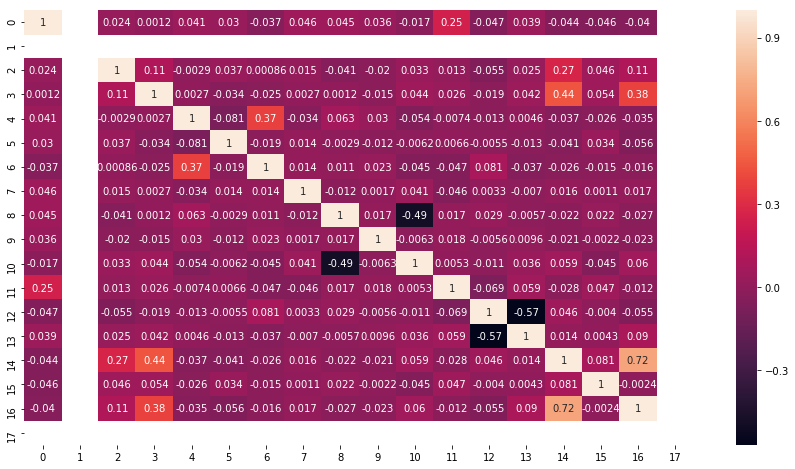

In [111]:
ax = plt.axes()
seaborn.heatmap(np.corrcoef(samplesT), annot=True, ax=ax)
plt.show()

Кажется 16 и 14 неплохо скоррелированы. Проверим.

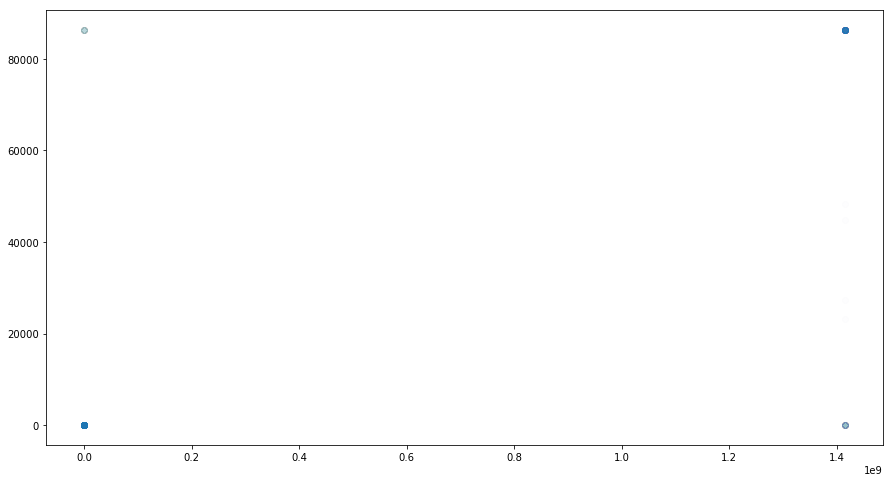

In [112]:
plt.scatter(samplesT[16], samplesT[14], alpha=0.007)
plt.show()

Видно, что тут определенно есть кореляция. Но я бы не сказала, что она настолько четкая. (все таки тут 2 зависимости, прямая и обратная, одновременно). Оставлю оба столбца.

Все остальные коэффициенты корреляции слишком близки к нулю, чтобы их отсекать.

Хотя стоит еще проверить на глазок.

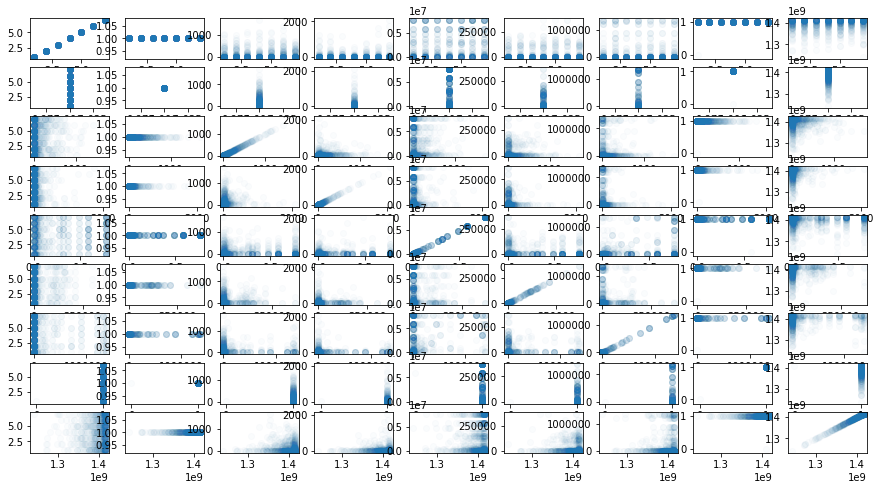

In [88]:
fig, axes = plt.subplots(9, 9)
for i in range(9):
    for j in range(9):
        axes[i, j].scatter(samplesT[i], samplesT[j], alpha=0.02)
plt.show()

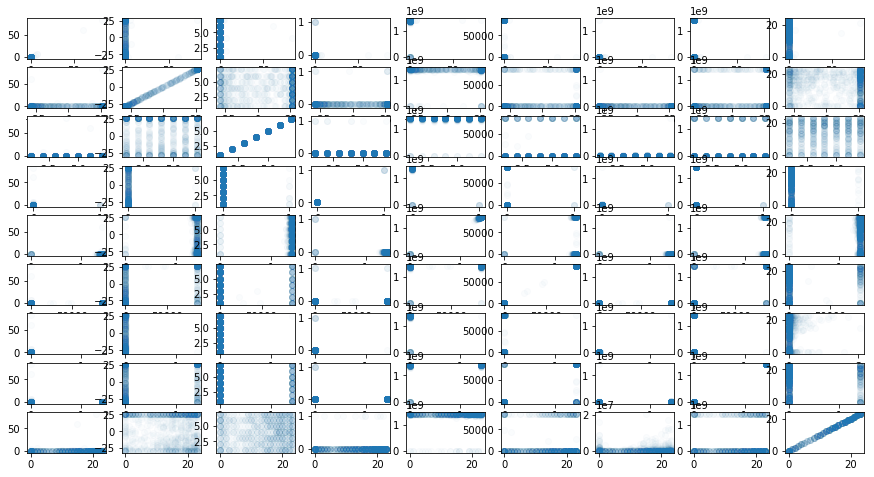

In [89]:
fig, axes = plt.subplots(9, 9)
for i in range(9, 18):
    for j in range(9, 18):
        axes[i - 9, j - 9].scatter(samplesT[i], samplesT[j], alpha=0.02)
plt.show()

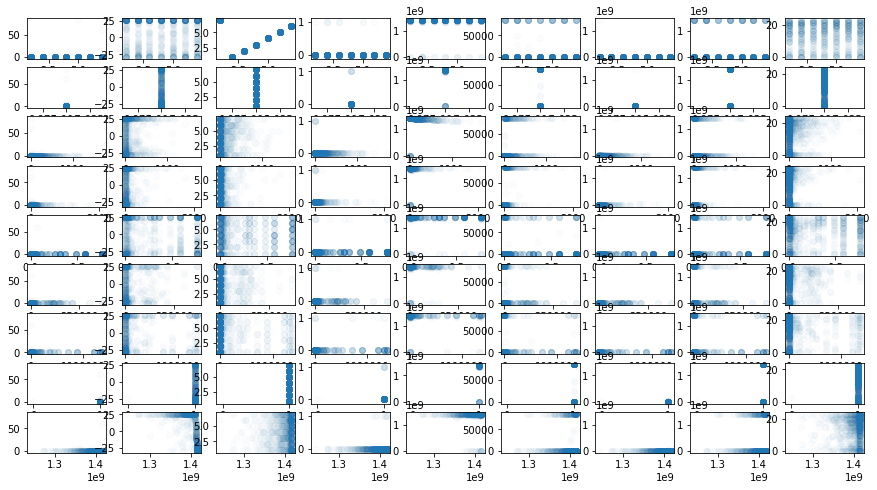

In [92]:
fig, axes = plt.subplots(9, 9)
for i in range(0, 9):
    for j in range(9, 18):
        axes[i, j - 9].scatter(samplesT[i], samplesT[j], alpha=0.02)
plt.show()

Я не вижу супер очевидных на глаз нетривиальных зависимостей, которых не смог найти наш коэф корреляции.

# Histograms

Теперь нарисуем распределения графиков.

Чтобы проверить реально ли что-то почти константа, отбросим концы(!!!).

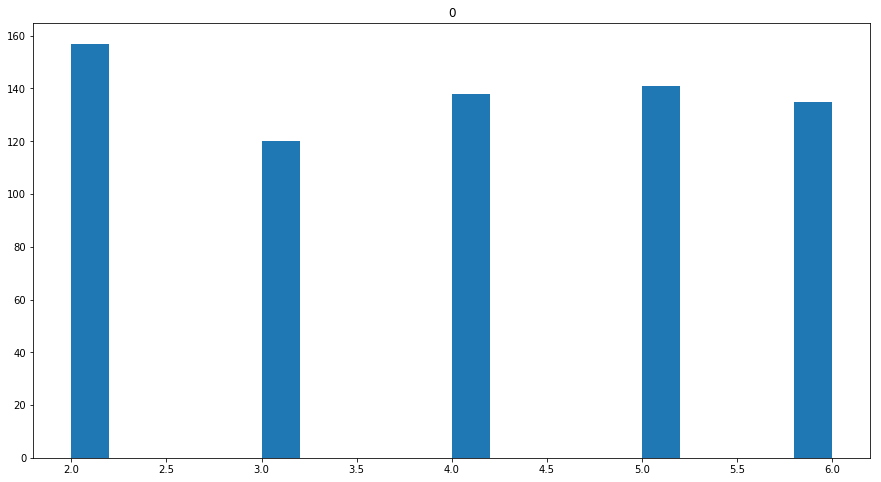

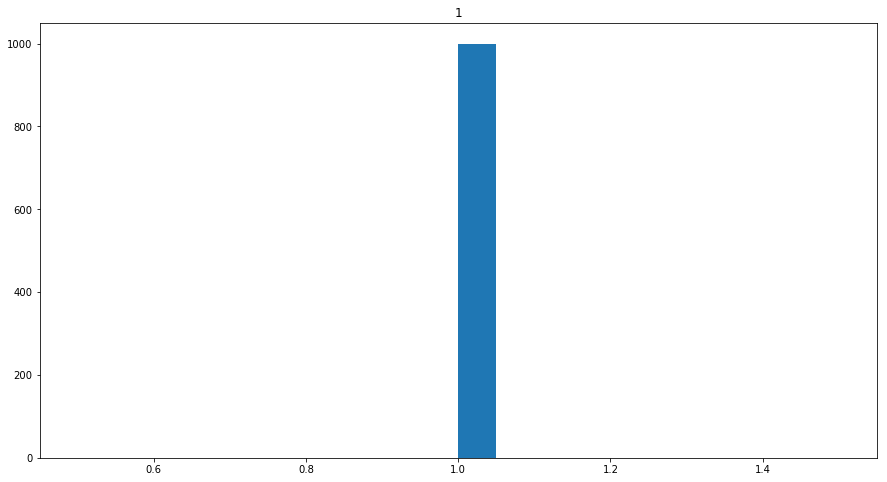

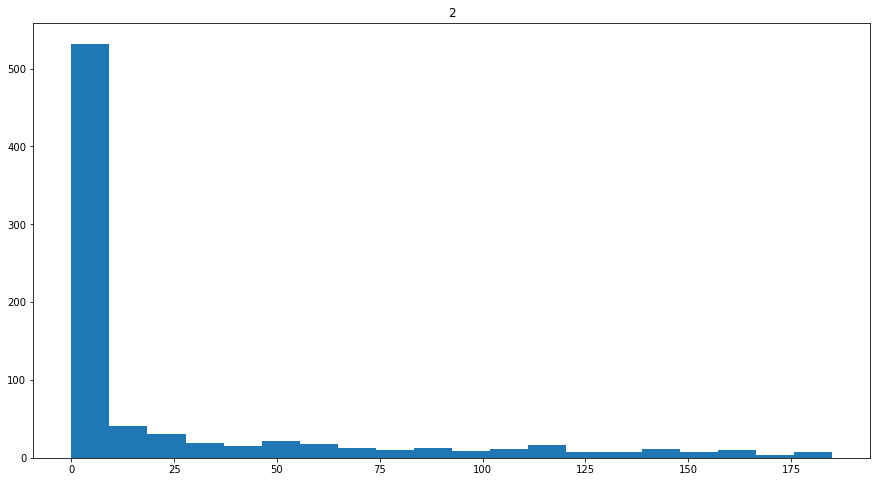

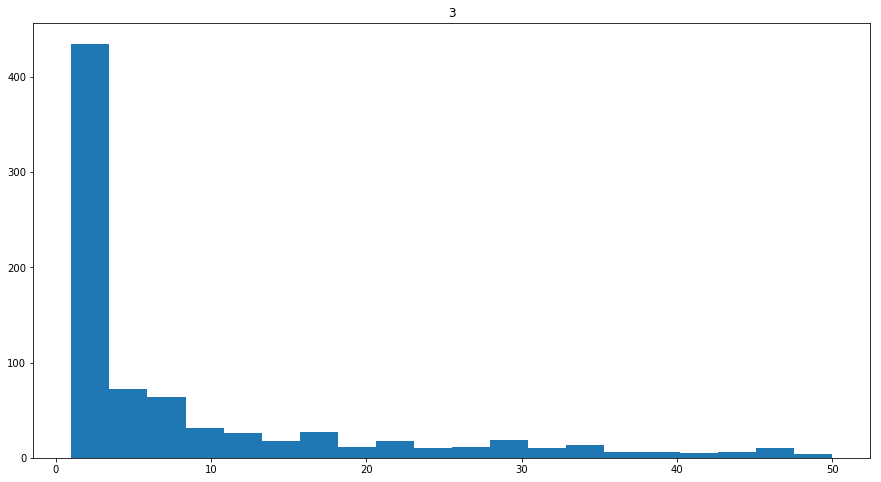

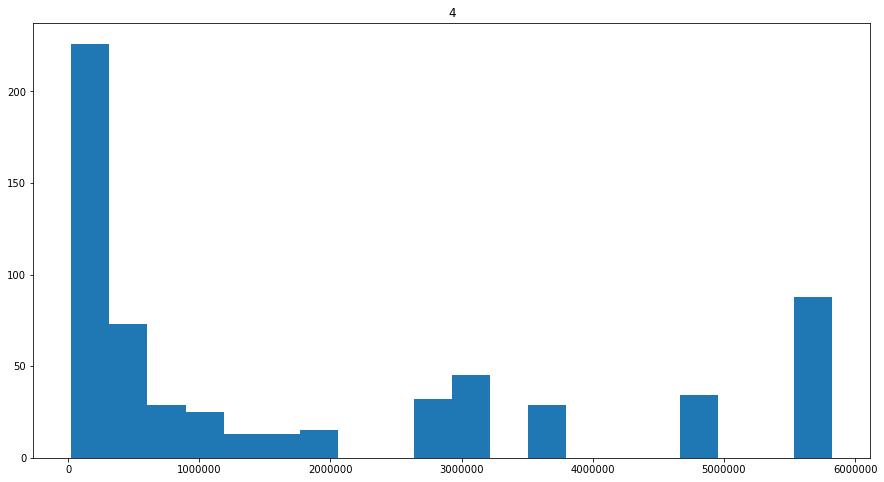

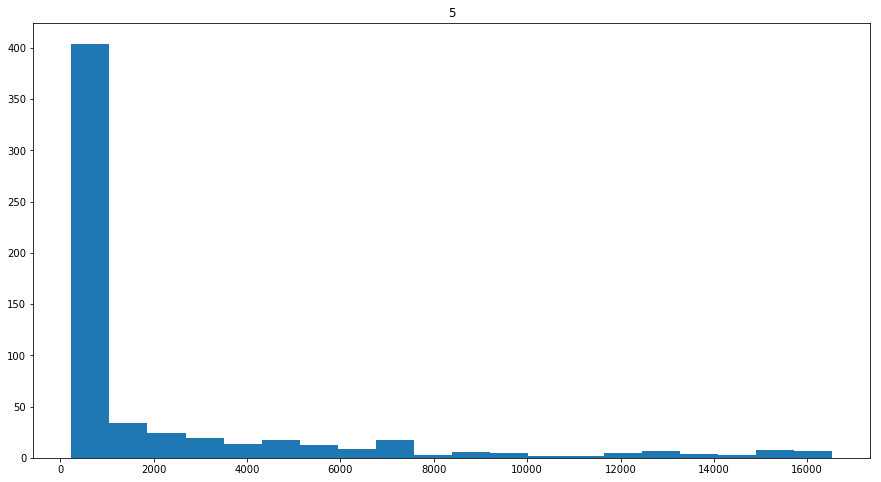

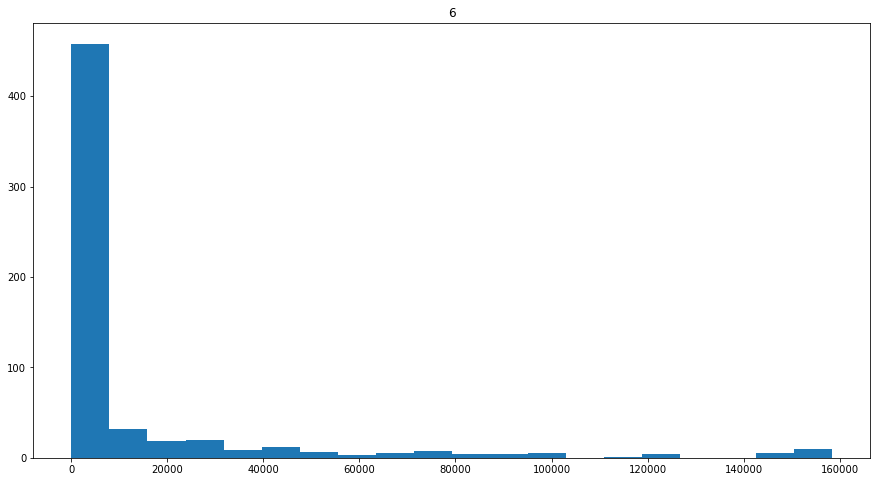

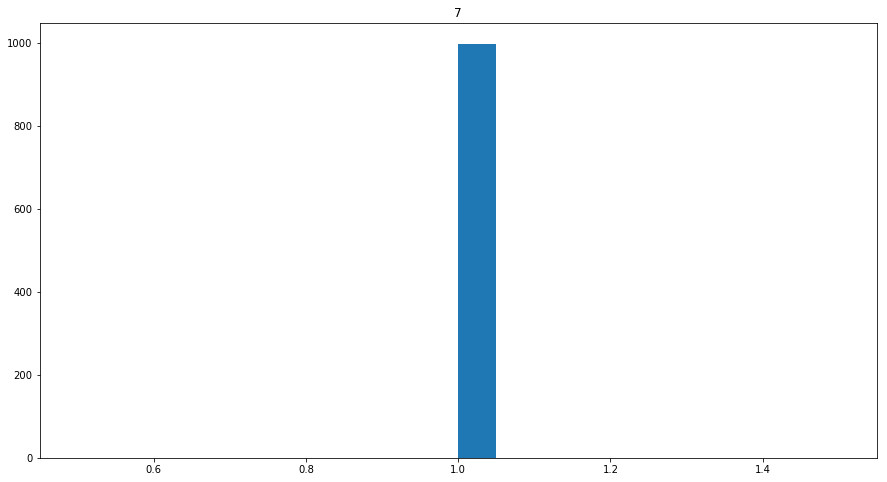

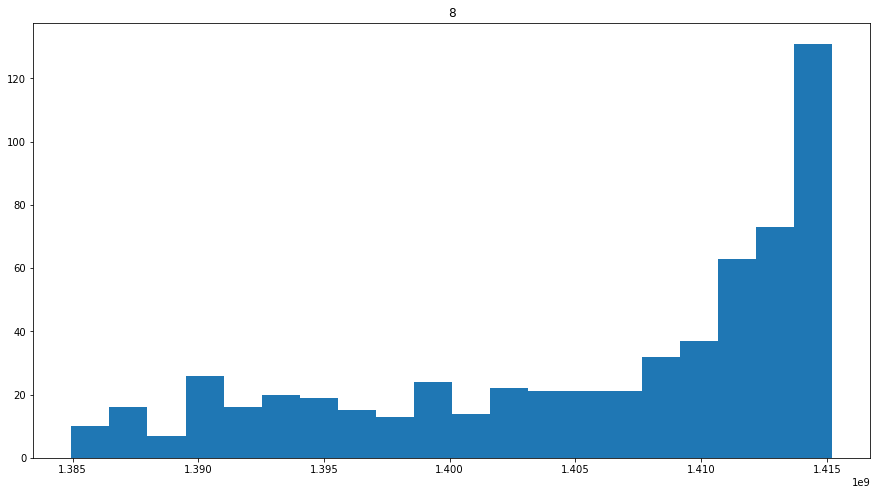

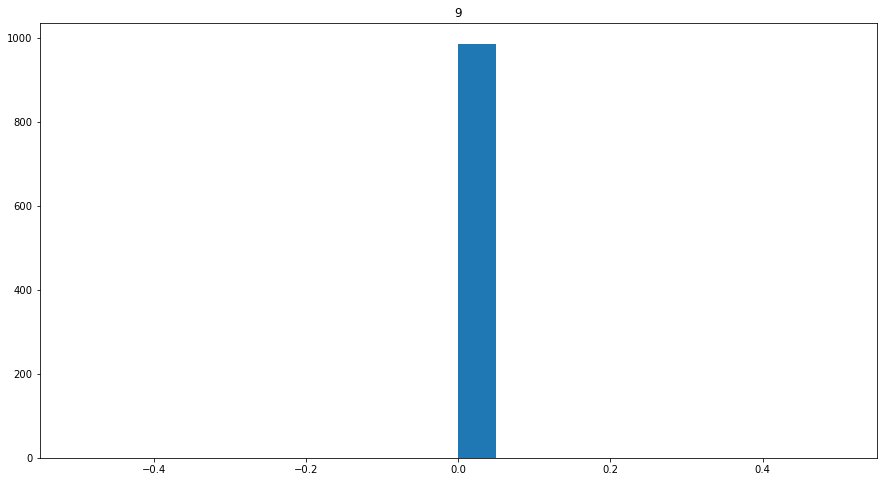

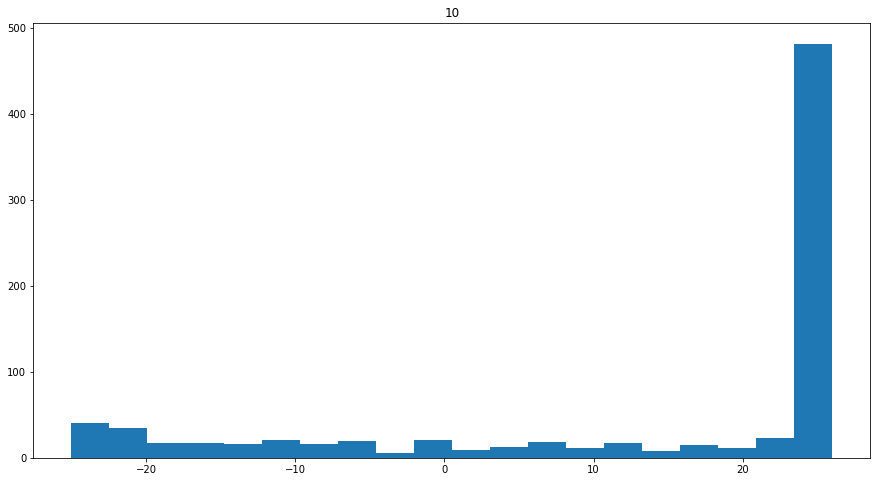

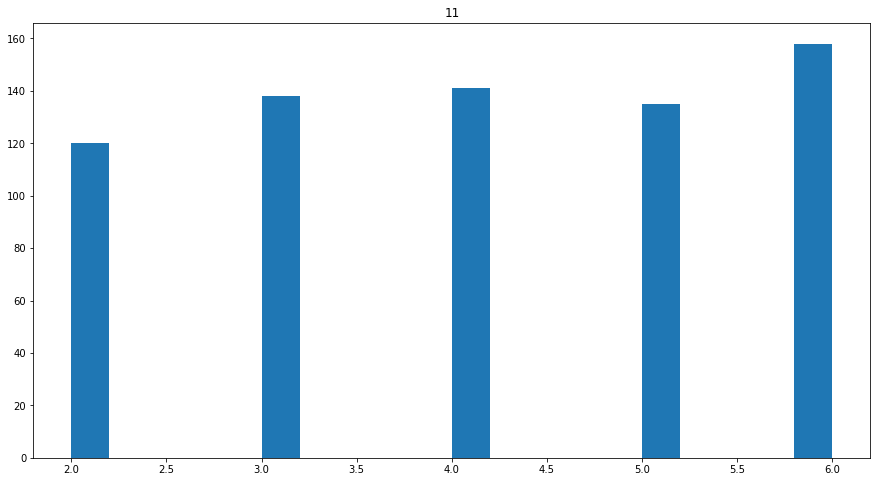

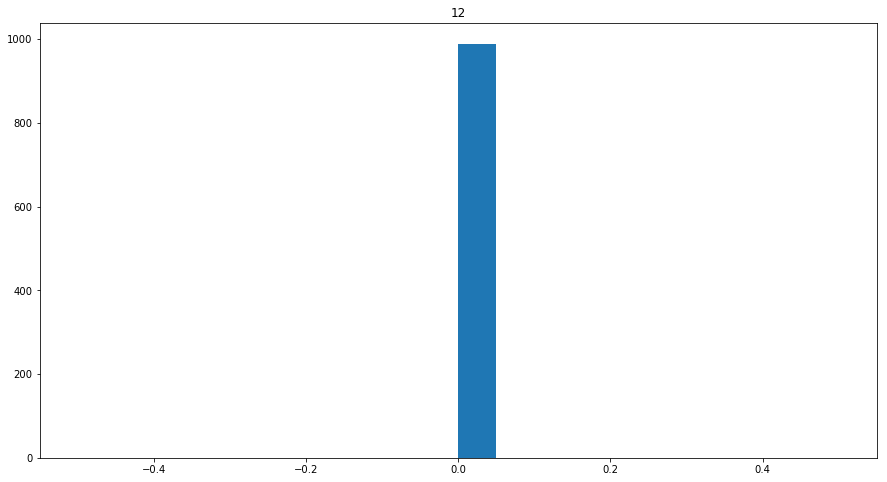

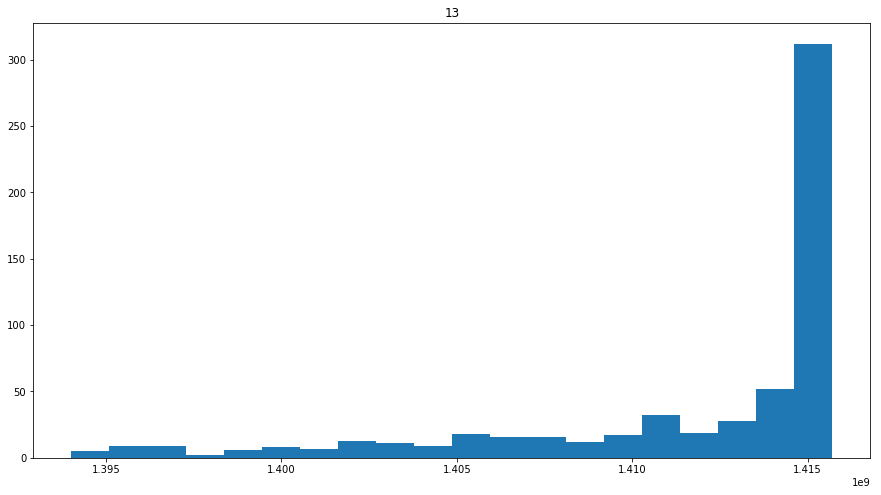

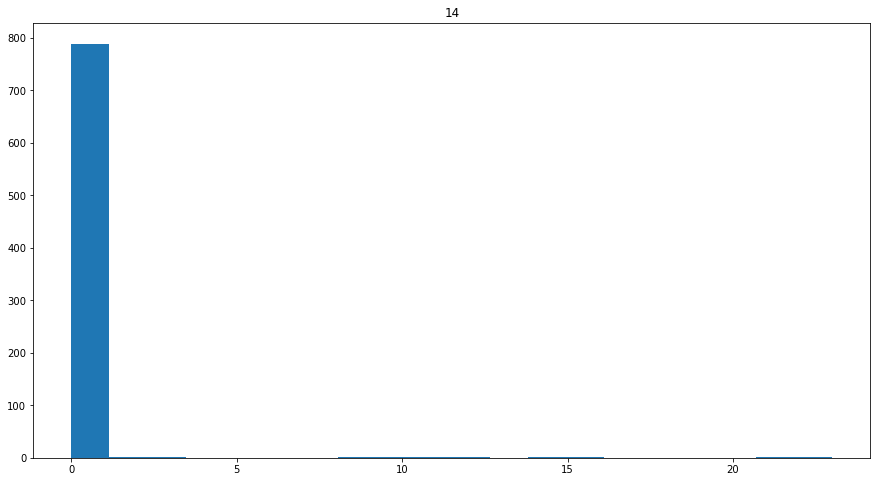

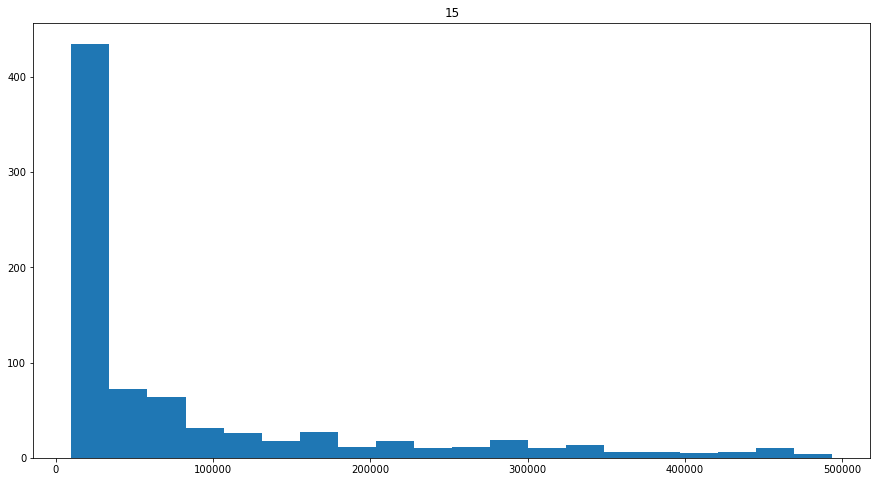

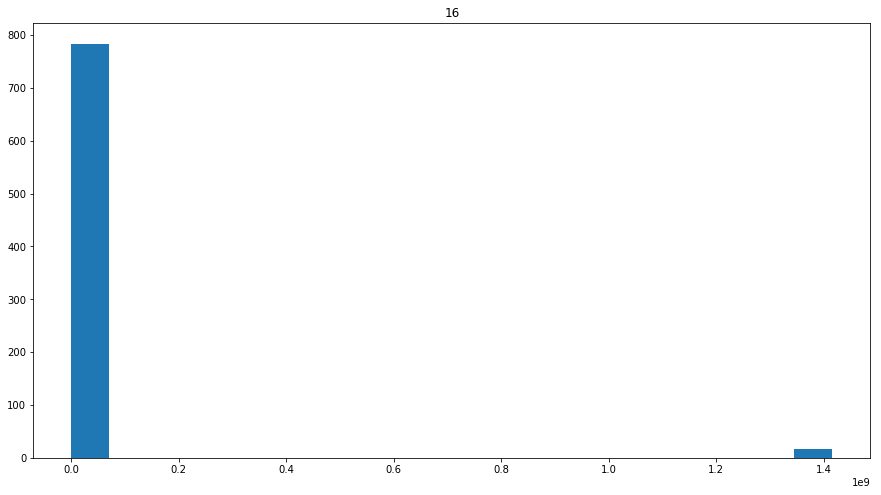

/home/nimloth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/nimloth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


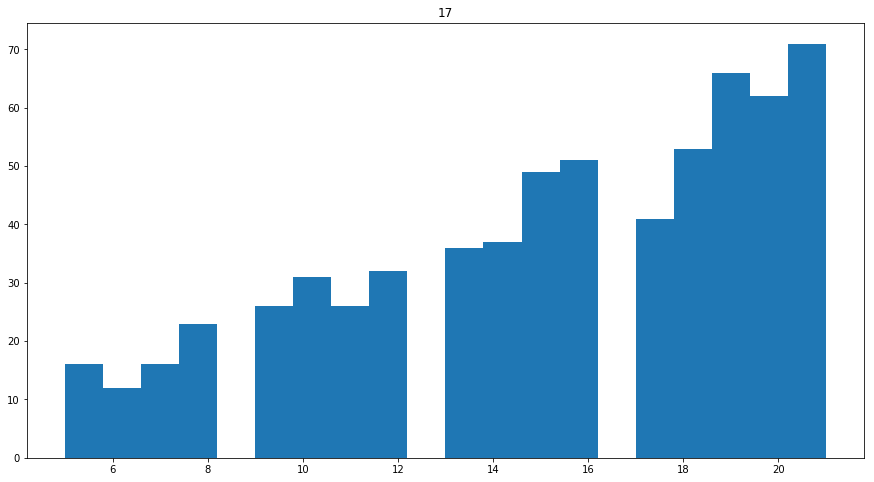

In [122]:
for i in range(columns_number):
    sorted_samples_i = np.sort(samplesT[i])
    lim = (sorted_samples_i[int(n * 0.2)],
             sorted_samples_i[int(n * 0.8)])
    plt.hist(samplesT[i], bins=20,
            range=lim)
    plt.title(i)
    plt.show()

1, 7, 9, 12, 14 - слишком маленькая дисперсия, даже учитывая убирание выбросов.
Выбрасываем.

Проверим выводы прологорифмировав.

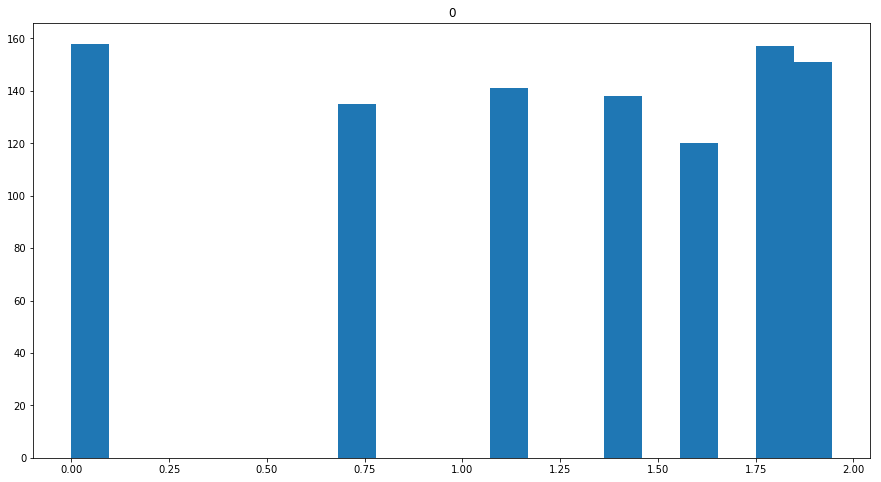

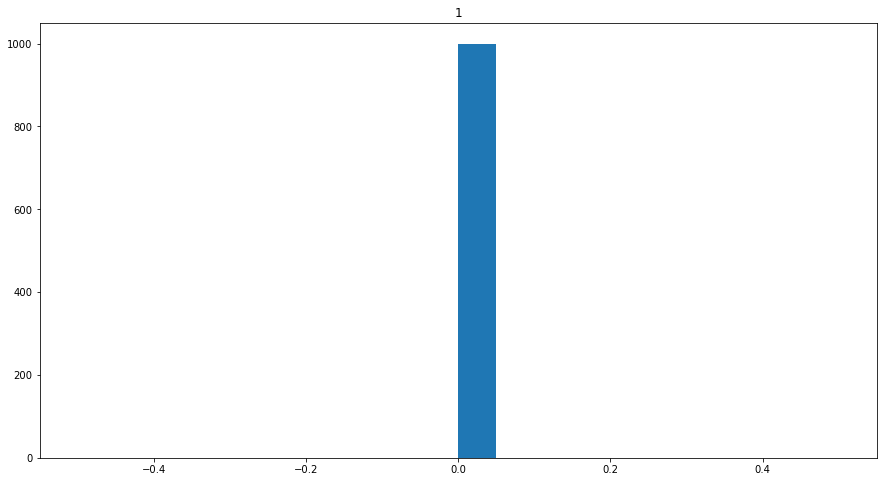

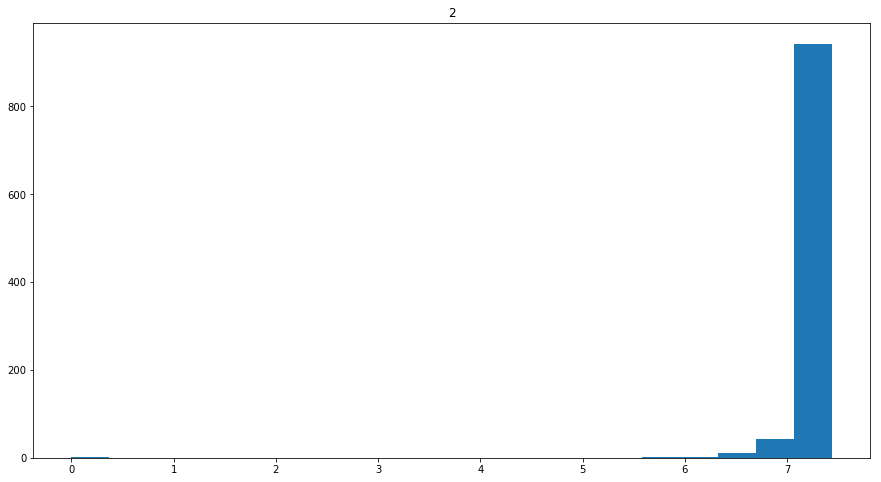

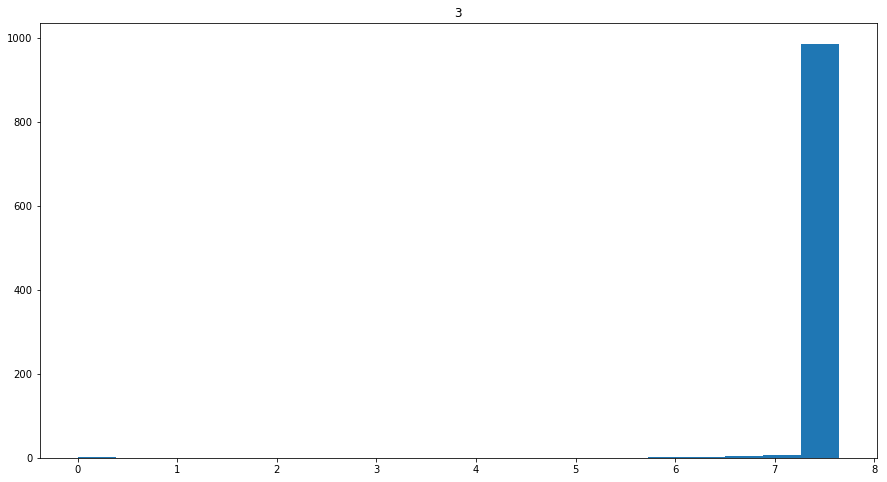

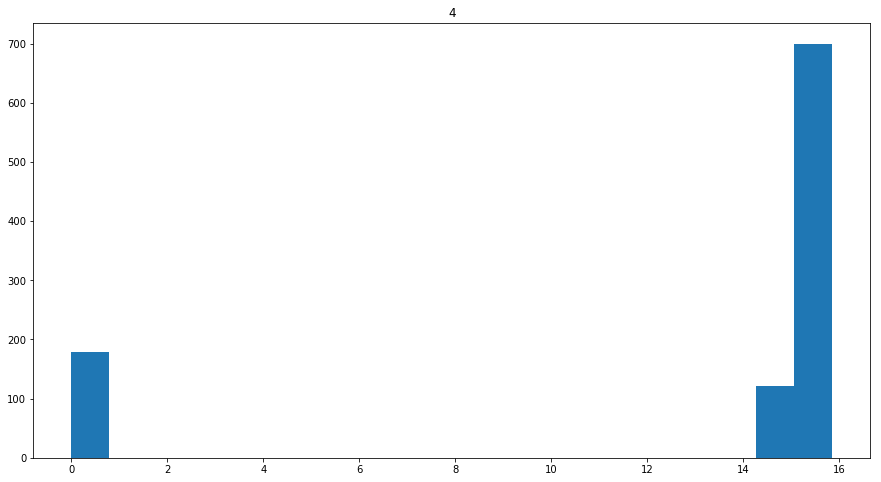

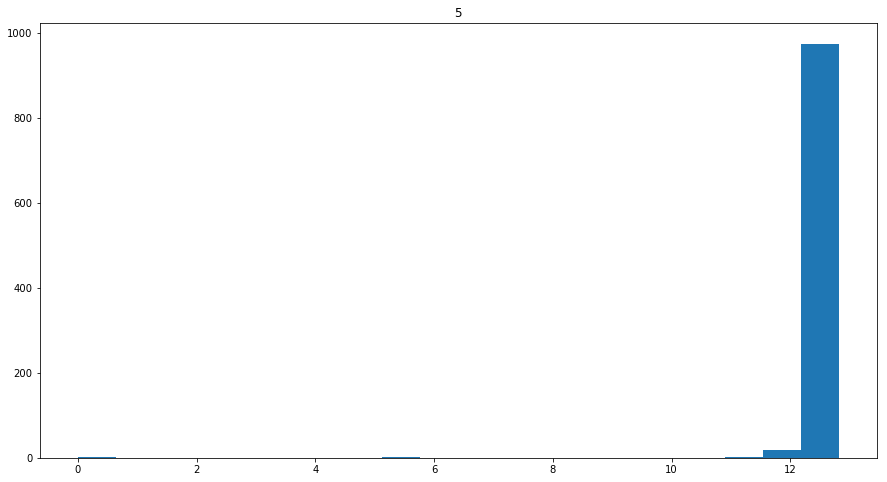

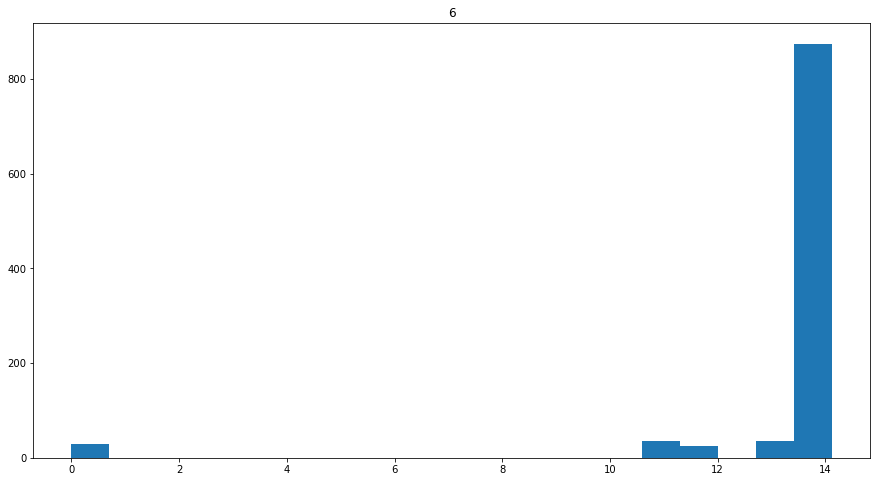

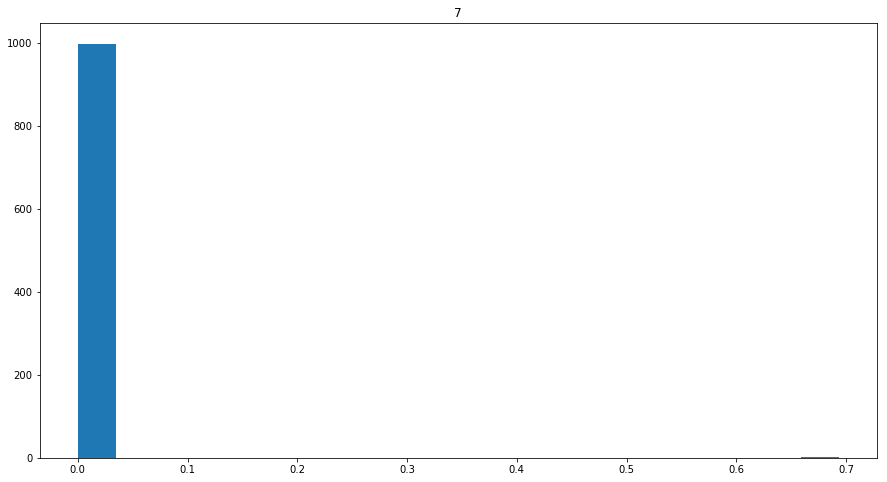

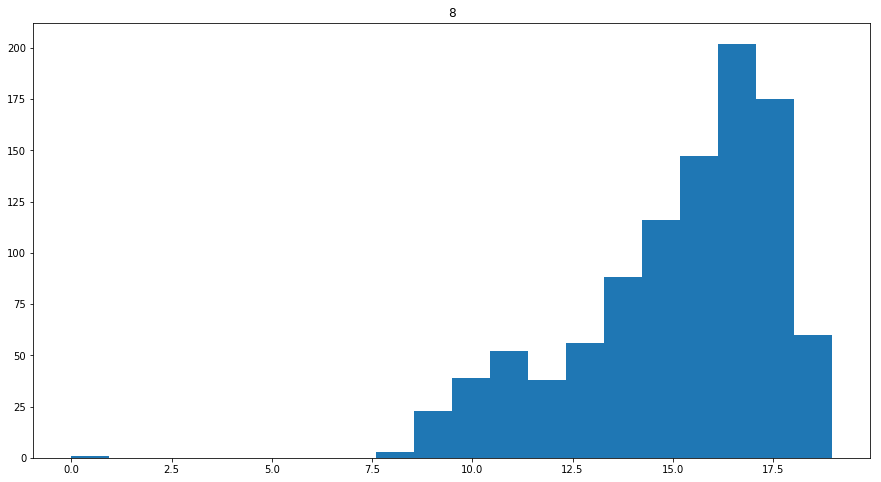

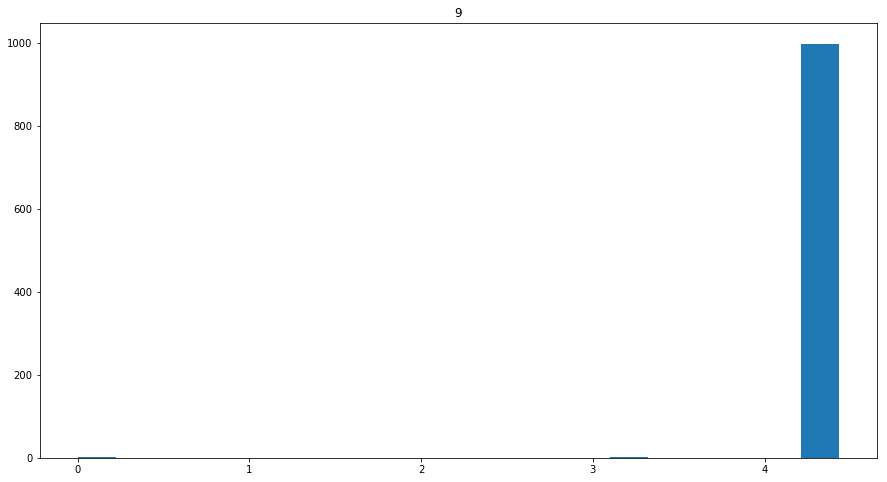

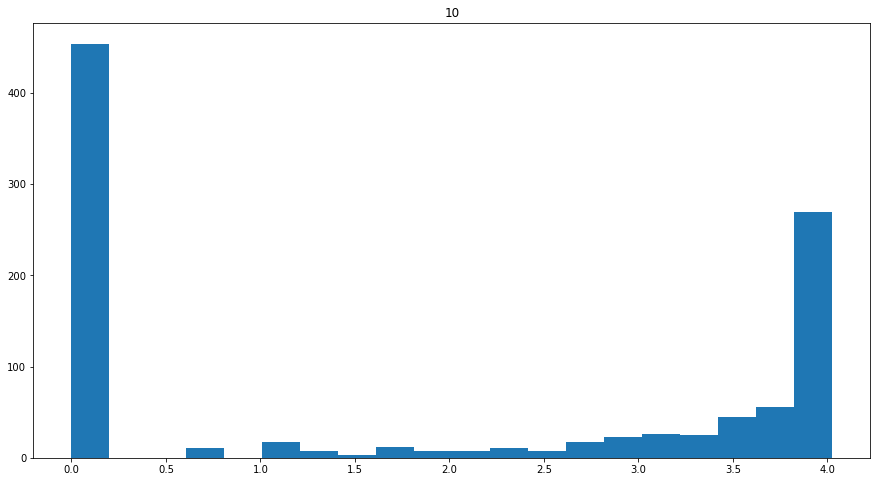

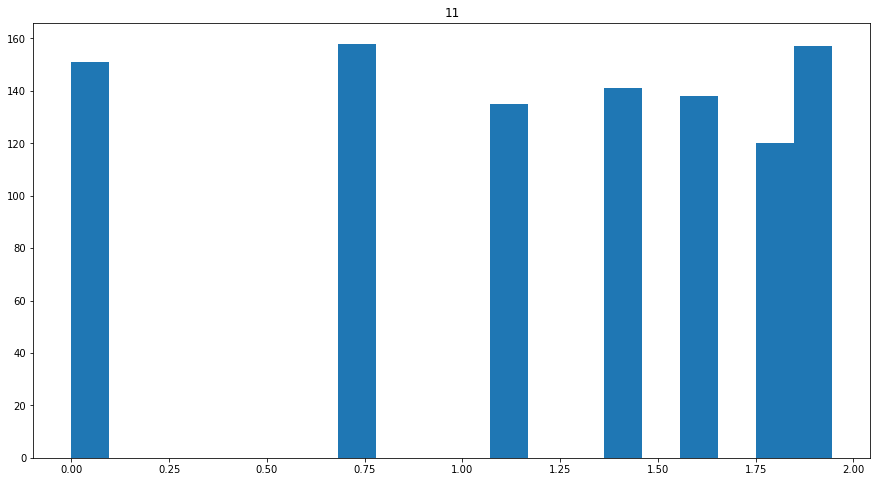

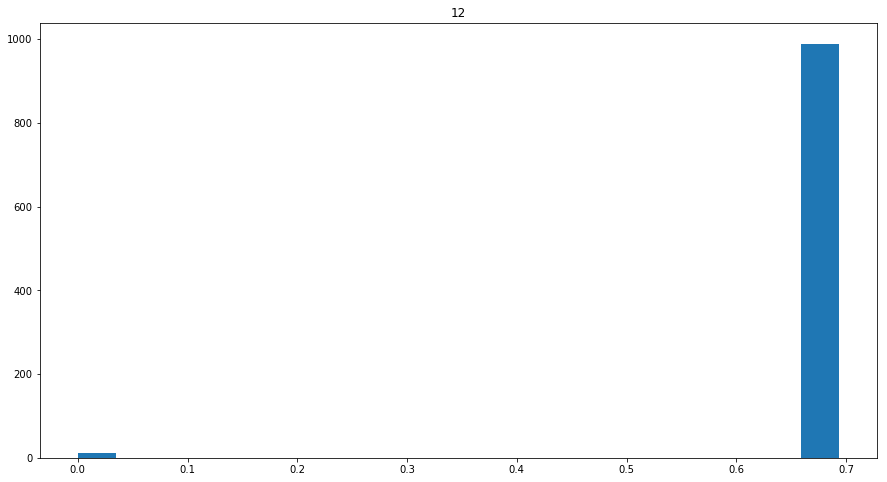

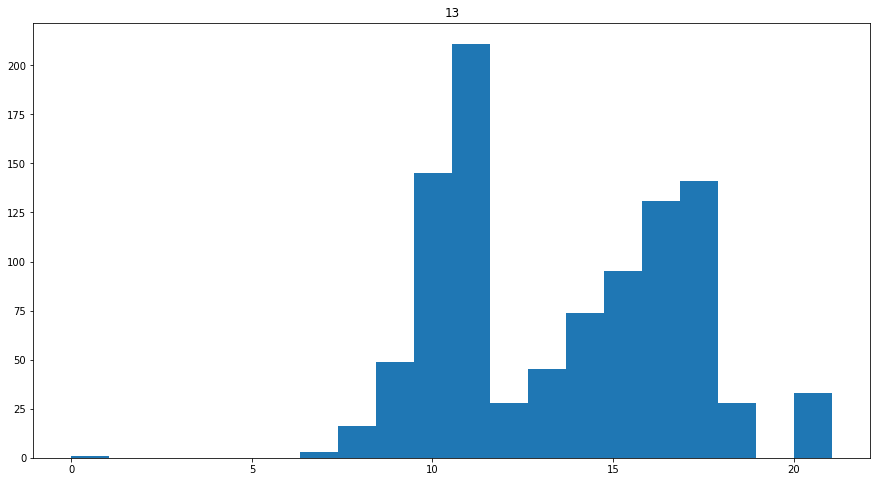

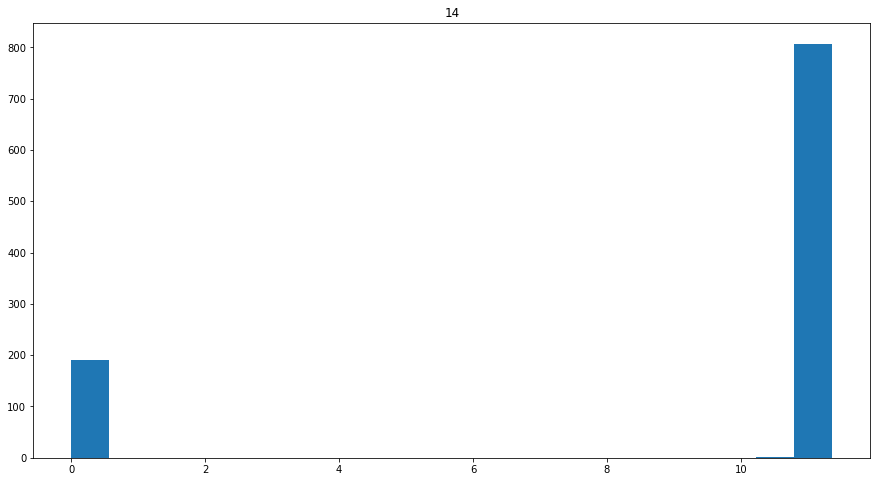

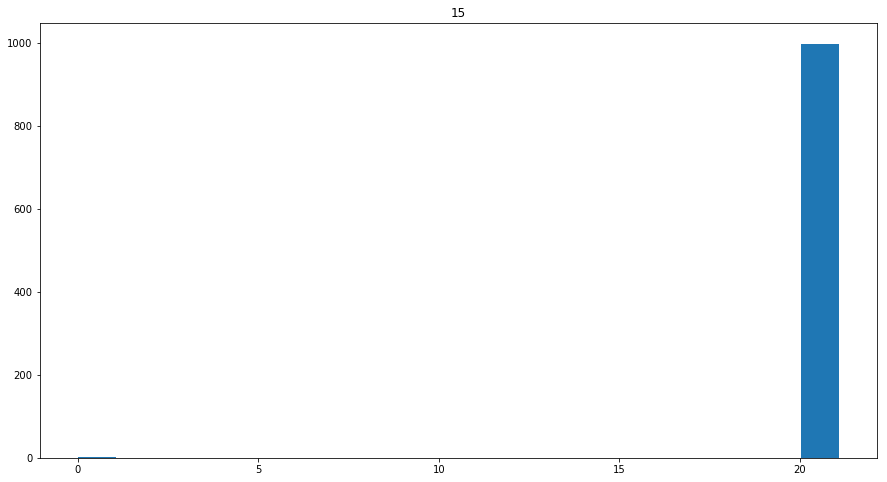

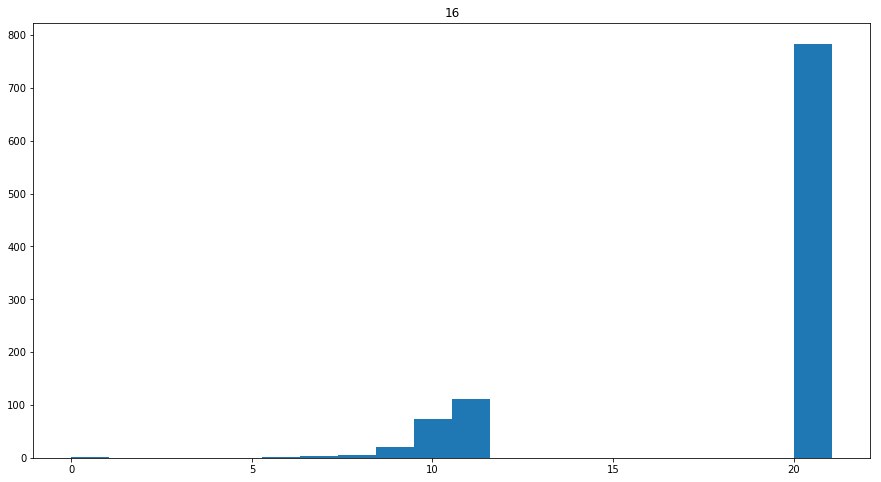

ValueError: range parameter must be finite.

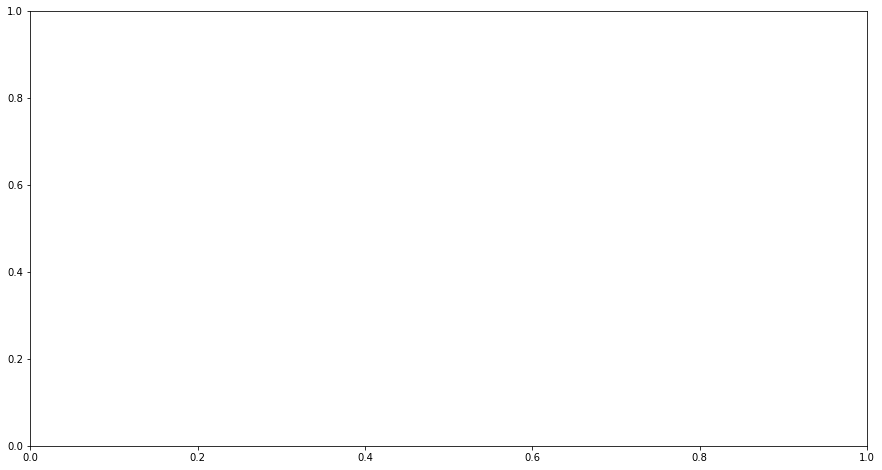

In [120]:
for i in range(columns_number):
    log_col = np.log(1 + max(samplesT[i]) - samplesT[i])
    plt.hist(log_col, bins=20, range=(log_col.min(), log_col.max()))
    plt.title(i)
    plt.show()

Ммм с 17 графиком что-то пошло не так =(
но 1, 7, 9, 12 - реально не оч. 14 можно и оставить

Что-то не так с 17.

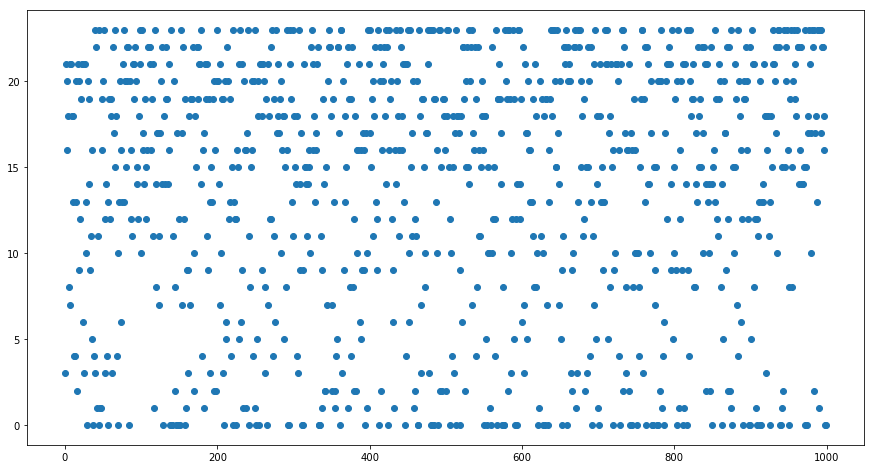

In [128]:
plt.scatter(range(len(samplesT[17])), samplesT[17])
plt.show()

Да вроден норм все...

Кроме того, что минимум после преобразования - nan.

# Nans

In [148]:
for i in range(columns_number):
    print(i, np.isnan(samplesT[i]).sum() / len(samplesT[i]))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.001


Как и ожидалось в 17 есть nan.

In [152]:
samplesT[17] = np.nan_to_num(samplesT[17])

In [153]:
for i in range(columns_number):
    print(i, np.isnan(samplesT[i]).sum() / len(samplesT[i]))

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0


1, 7, 9, 12 - выкидываем.

In [155]:
filtered_data = []
for i in range(columns_number):
    if i in {1, 7, 9, 12}:
        pass
    else:
        filtered_data.append(samplesT[i])
filtered_data = np.asarray(filtered_data)

In [161]:
print(filtered_data.shape)

(14, 1000)


# PCA

In [165]:
# run PCA
pca1 = PCA(filtered_data.T)

# % of explained variance
# print("Explained variance")
# for d in pca1.fracs:
#     print(d)

# first eigenvector
# print("\n\nCoords of first eigenvector")
# for i, d in enumerate(pca1.Wt[0]):
#     print(i, '\t', d)

#print "\n\nCoords of second eigenvector"
#for d in pca1.Wt[1]:
#    print d

print(np.argsort(np.abs(pca1.Wt), axis=1))

[[ 8  0  4 13  5 11  3  9  6  7  1  2 12 10]
 [ 8  1  9  0  4 11 13 12 10  2  5  3  7  6]
 [ 2 10 12  1  9 13 11  4  7  6  0  8  3  5]
 [12 13  4 10  2 11  1  6  7  5  9  3  8  0]
 [10  7  0  3  6  8 11  2 12  5  9  4  1 13]
 [ 2 10  7  3  0  6  8 12  9  5  1  4 13 11]
 [ 7  5  6 12  3  4  1  2 10 13  8 11  0  9]
 [ 7  3  6 10  2  9  5  0  8 12 13 11  1  4]
 [10  3  9  4  6 12  5  7  0  2  8 11 13  1]
 [ 9  6 10  4  7 12  3  1  5 13  2 11  0  8]
 [ 9  4  7  6  8 13 11  1  3  5  0 10 12  2]
 [13 11  1  8  6  9  7 10  4 12  0  2  5  3]
 [13  4 10  0  8  1  9 12 11  2  3  5  7  6]
 [ 0  4  3  7  5  6 13  8  2 11  9  1 12 10]]


Итак, самые классые векторы, которые вносят наибольший вклад в первые вектора - справа сверху.

Давайте на глазок оставим те, которые там есть: 0, 1, 2, 3, 5, 6, 7, 8, 10, 12, 13... По сути только 4 и 9 достаточно далеко встречаются от угла.

Не много ли мы оставили? =( Жизнь наверное покажет

А вообще сколько выбирать может зависить от процента дисперсии, который нам нужен и который мы можем оценить, посмотрев на собственные значения, но так как мы такими данными не обладаем, то оставим как есть.

In [171]:
final_data = []
for i in range(14):
    if i in {4, 9}:
        pass
    else:
        final_data.append(filtered_data[i])
final_data = np.asarray(final_data)

In [172]:
print(final_data.shape)

(12, 1000)


# Аномалии

## Первичная обработка данных

In [173]:
data = pd.read_table('dataset_16_2', sep='\t', header=None)

In [174]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,df84cb4ecdf09e5ff08ccf605c93cd33,7eebdb49c85c7111eea1f3ca52fce8bc,1429627313,162,86401,25910,6,13,0,64,...,1,3,0,3,100,-,-,0,0,2
1,6ab6709af8922e1e9d9eac9d11646d1a,d5df093718f8f9b239376b1c136c75b1,1443635700,0,-,6971,8,10,-,0,...,-,-,-,-,-,-,-,-,-,2
2,e9f8a2dddd2445264d2db1b32e5c5c2b,f39c150ff0956f915d84e87d45f6c1e4,1443653041,0,-,1825,1,2,-,0,...,-,-,-,-,-,-,-,-,-,1
3,f3d2cb85a12f21887813cb3b22dbe7d0,6c2b4d3fbecd5f628db1090bba5bc537,1405667008,439,-,15,9,9,-,0,...,-,-,-,-,-,-,-,-,-,1
4,d6b99af7ab5d05b6c4277877f9d3af73,782094d9d0b65b59aa87456e788cd125,1430733562,150,86401,29562,13,21,0,17,...,-,0,0,-,-,-,-,0,-,1


Кажется в нулевом и первом столбце строки.

In [177]:
not_str = 0
empty_str = 0
for elem in data[0]:
    if type(elem) != str:
        not_str += 1
    if elem == "":
        empty_str += 1
print(not_str, empty_str)

0 0


In [178]:
not_str = 0
empty_str = 0
for elem in data[1]:
    if type(elem) != str:
        not_str += 1
    if elem == "":
        empty_str += 1
print(not_str, empty_str)

0 0


Это значит, что везде эти страки присутствуют и, значит, каких-то аномалий "их отсутствия" не будет.
Тогда выкинем их.

In [179]:
del data[0]
del data[1]

In [180]:
data.head()

,2,3,4,5,6,7,8,9,10,11,...,45,46,47,48,49,50,51,52,53,54
0,1429627313,162,86401,25910,6,13,0,64,1,1,...,1,3,0,3,100,-,-,0,0,2
1,1443635700,0,-,6971,8,10,-,0,0,1,...,-,-,-,-,-,-,-,-,-,2
2,1443653041,0,-,1825,1,2,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
3,1405667008,439,-,15,9,9,-,0,0,1,...,-,-,-,-,-,-,-,-,-,1
4,1430733562,150,86401,29562,13,21,0,17,1,1,...,-,0,0,-,-,-,-,0,-,1


In [184]:
columns_number = 55
n = len(data)
print(n)
eps = 10**(-6)

9096


In [182]:
def convert(s):
    dict = {'пн':1., 'вт':2., 'ср':3., 'чт':4., 'пт':5., 'сб':6., 'вс':7., '-':eps, '':eps, None:eps, 0:eps}
    if s in dict.keys():
        return dict[s]
    else:
        return float(s)

In [185]:
converted_data = pd.DataFrame()
for index, row in tqdm(data.iterrows()):
    new_row = []
    for i in range(2, columns_number):
        new_row.append(convert(row[i]))
    converted_data = converted_data.append([new_row])

9096it [01:10, 128.45it/s]


In [190]:
samples = np.asarray(converted_data)
samplesT = samples.T
columns_number -=2

Сначала уберем то, где особо нет дисперсии. Так как у нас 53 столбца!!!

Так что наверное надо постараться быть жесткими и убрать побольше столбцов.

Замечу, что там где есть нули - скорее значит, что там не было значений (начальная замена, но это тоже хорошо, так как нет значения - тоже признак)

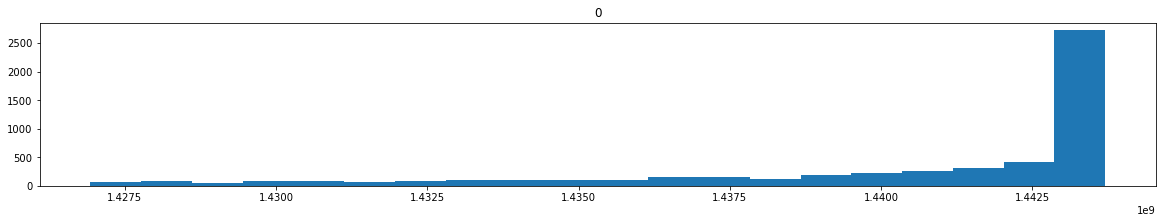

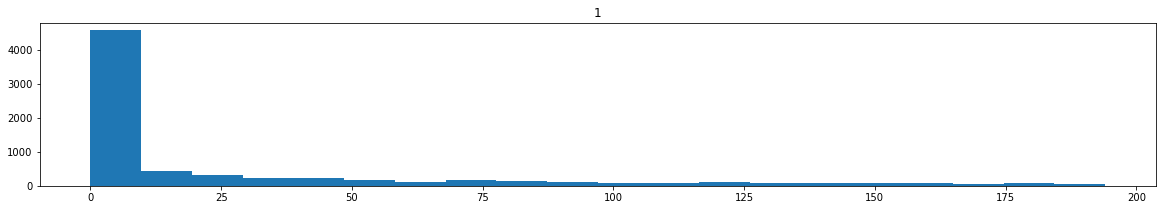

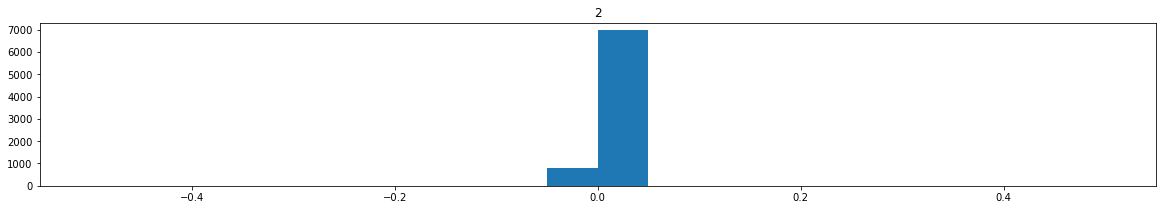

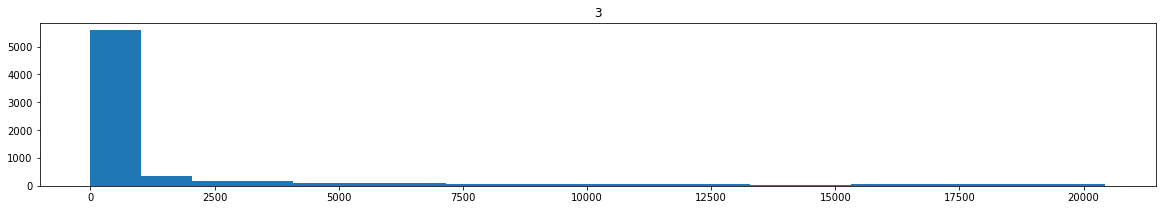

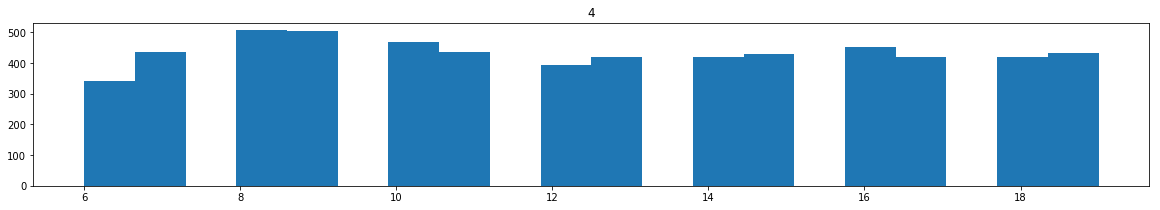

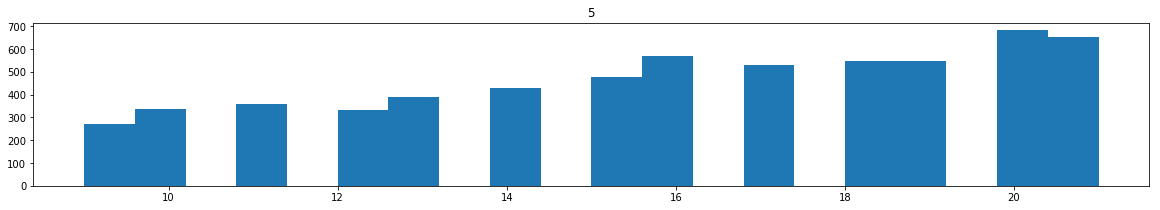

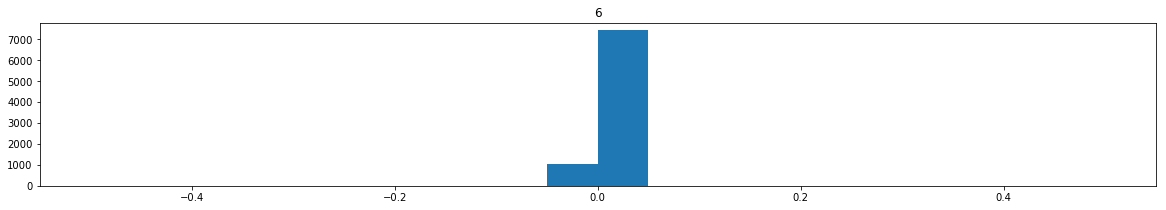

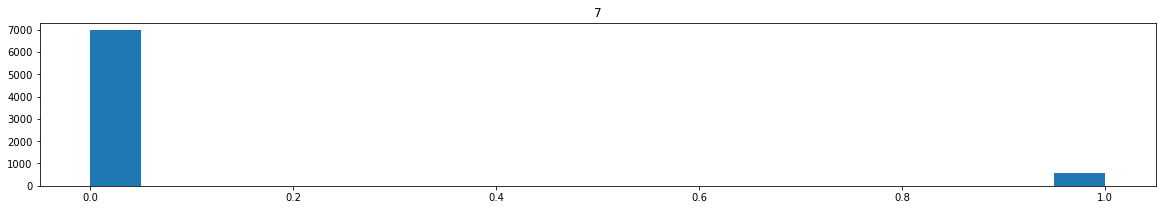

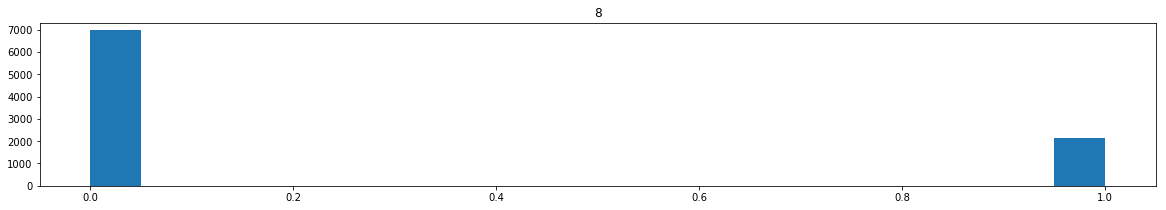

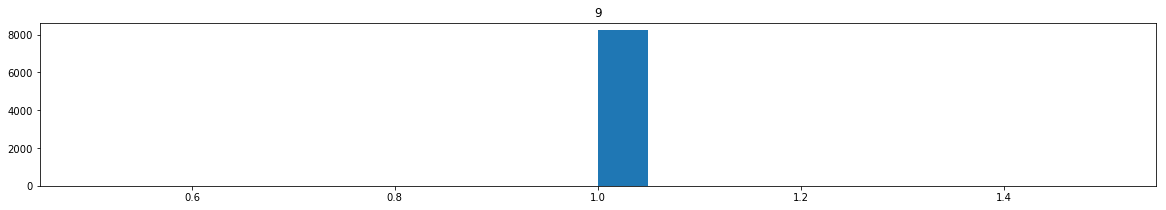

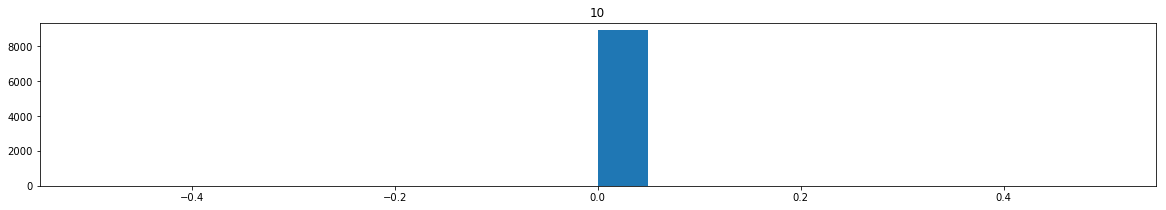

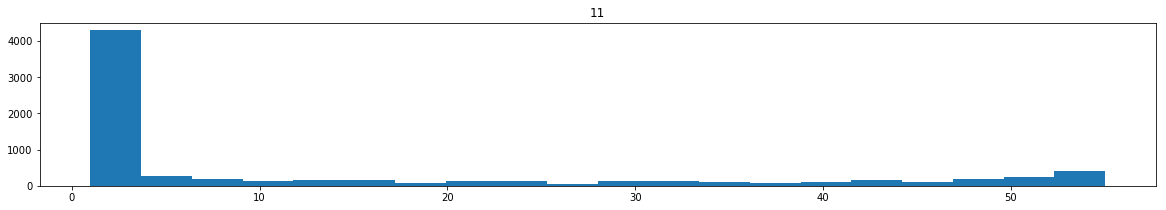

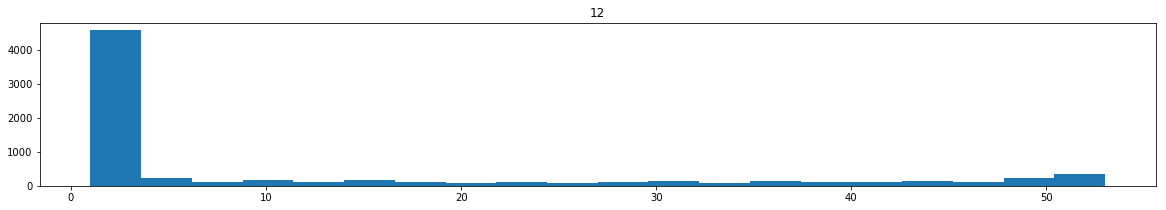

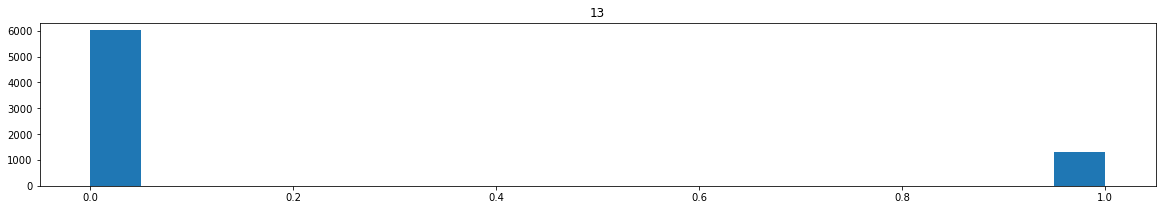

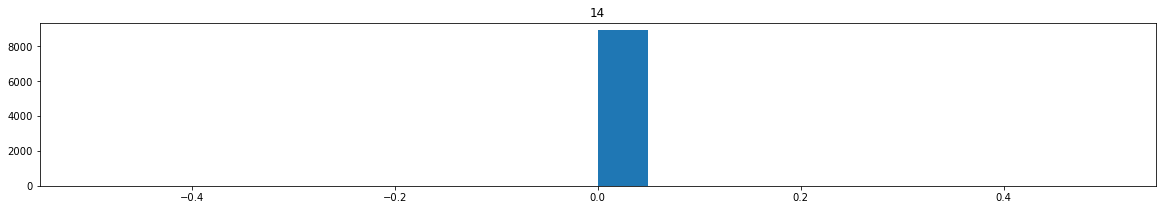

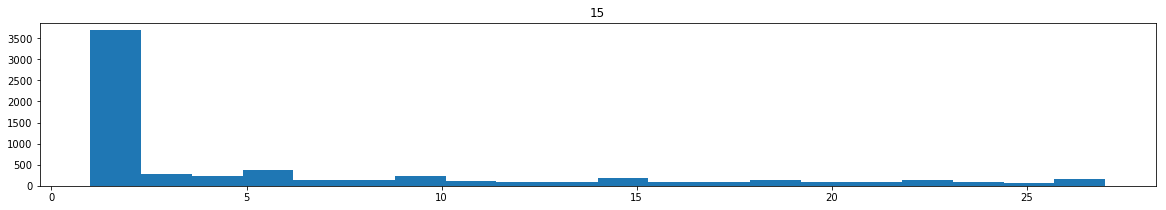

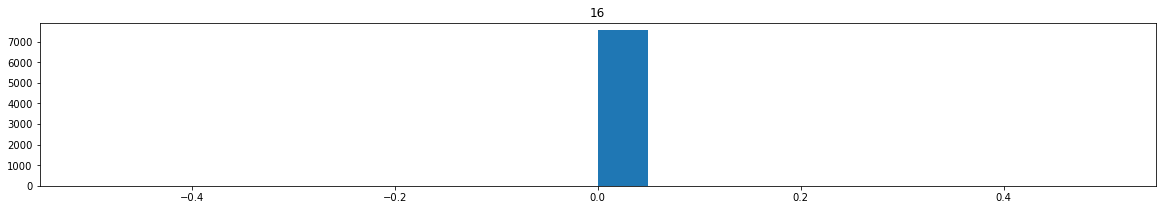

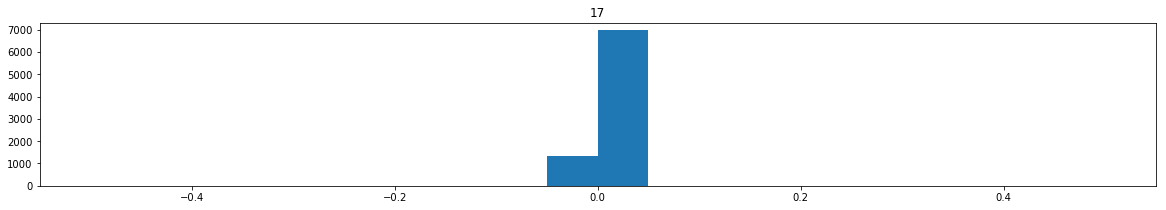

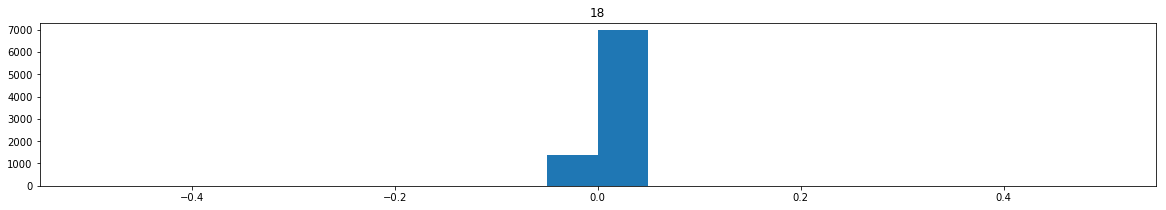

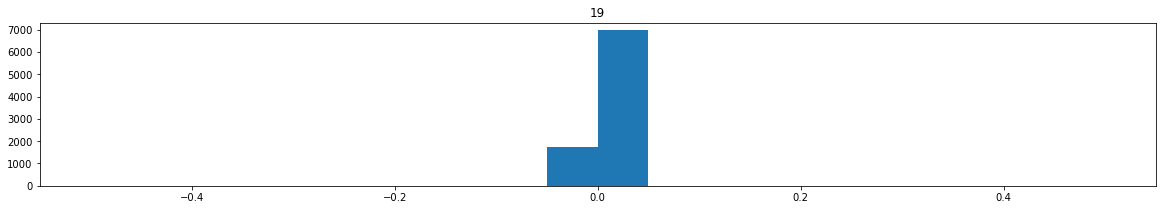

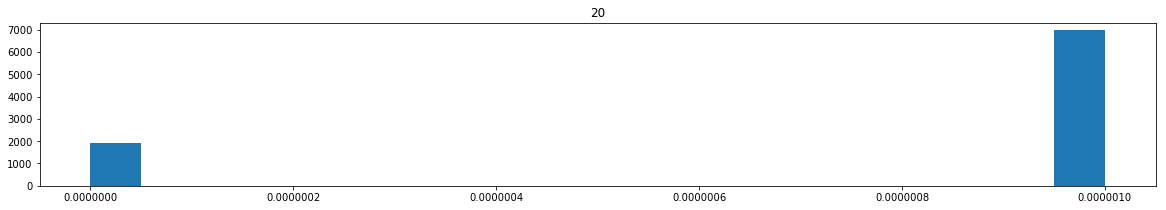

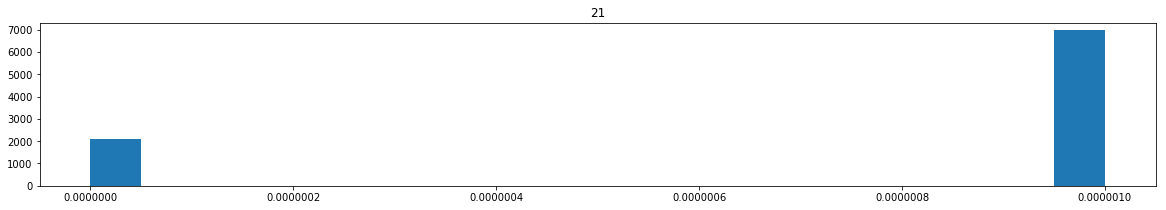

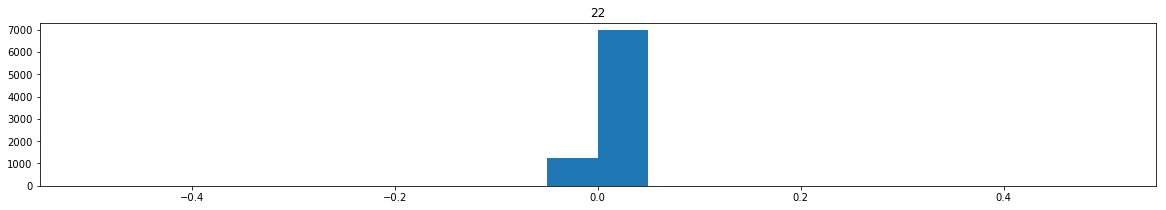

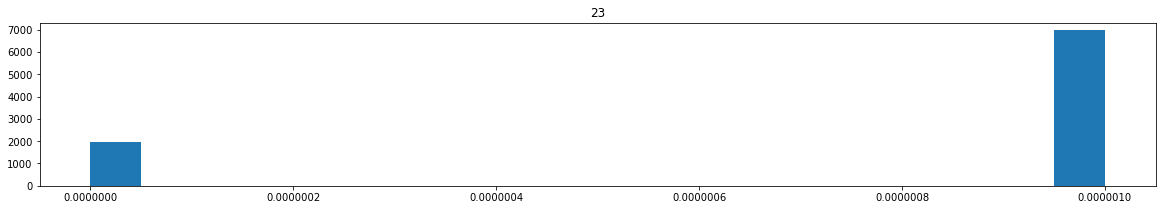

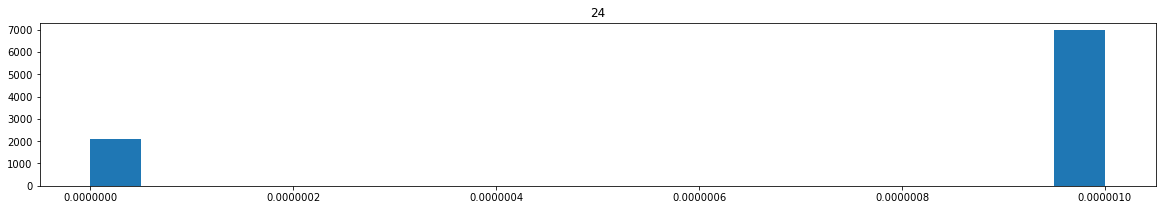

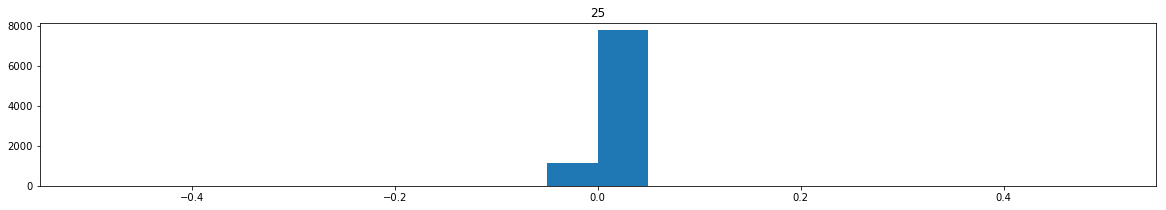

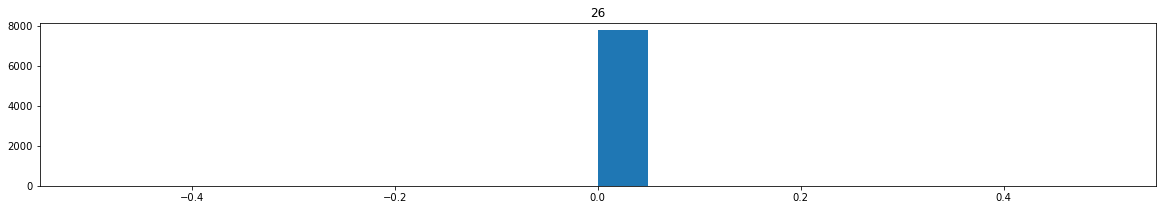

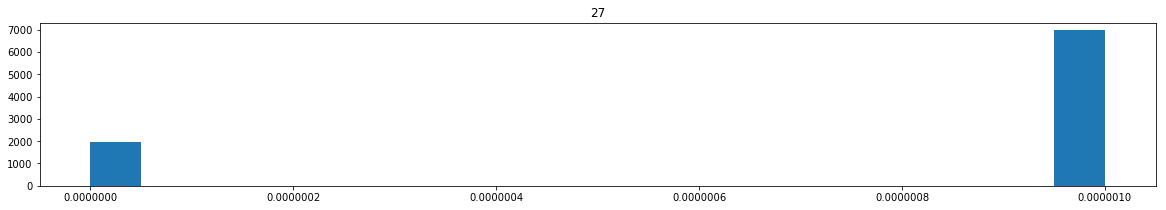

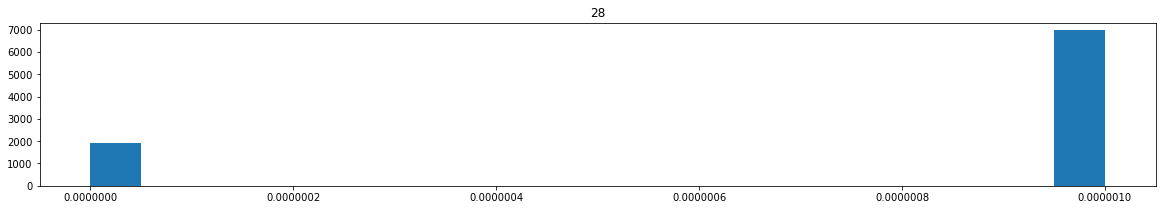

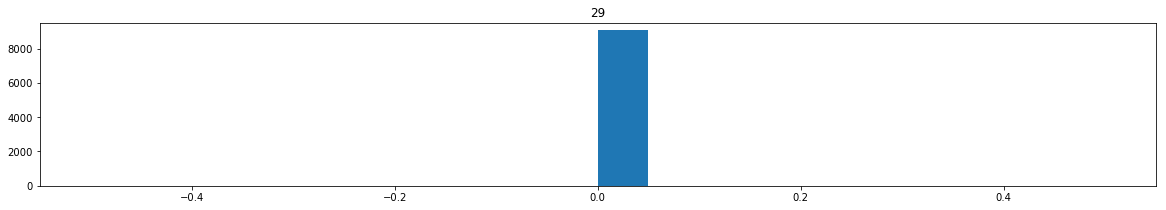

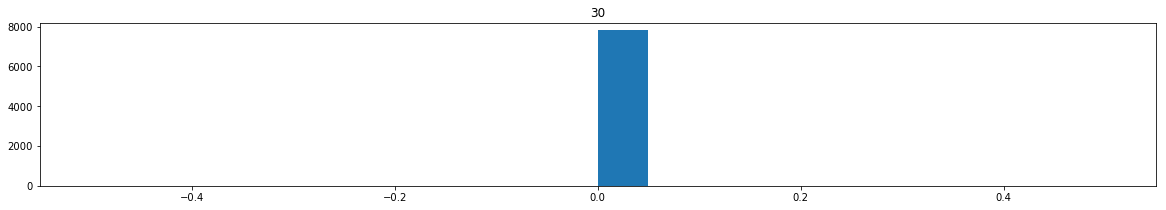

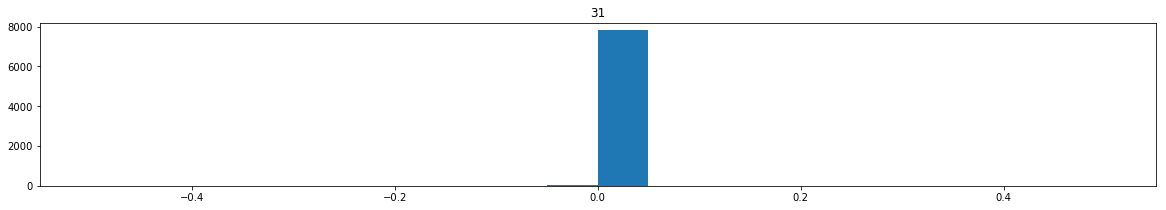

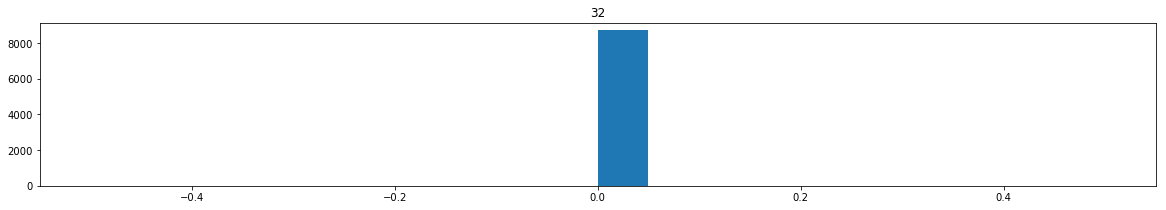

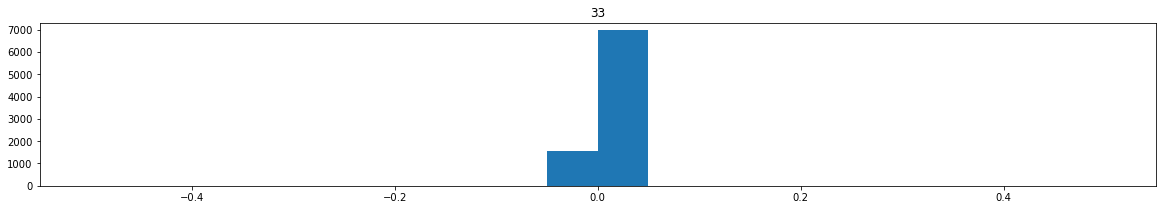

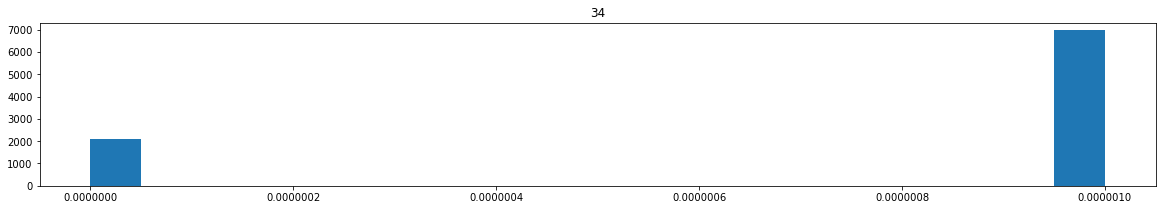

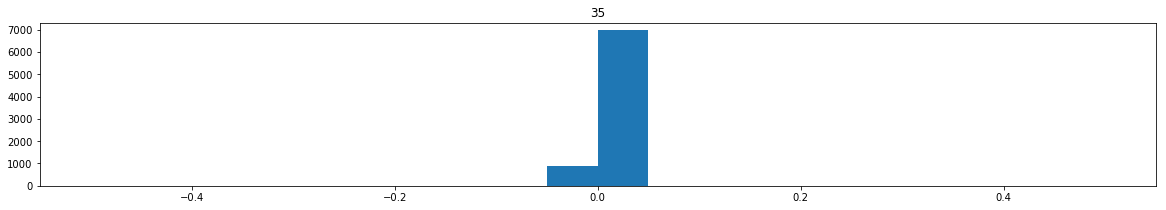

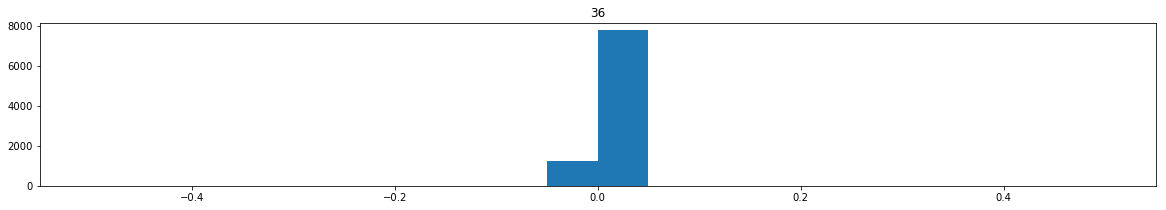

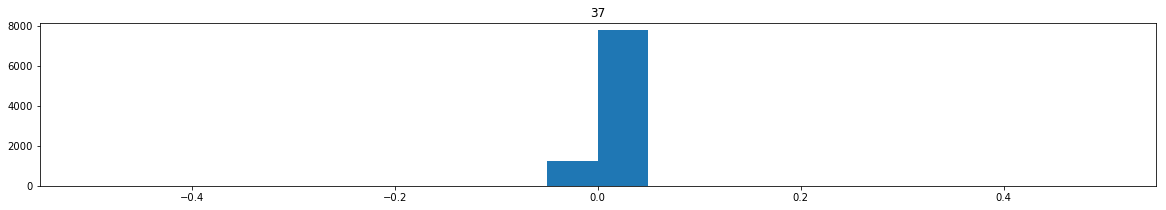

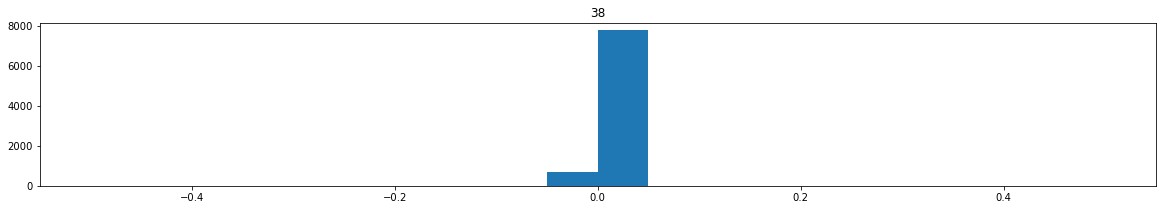

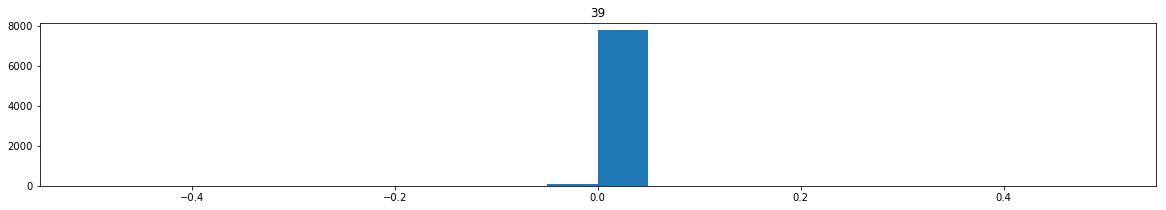

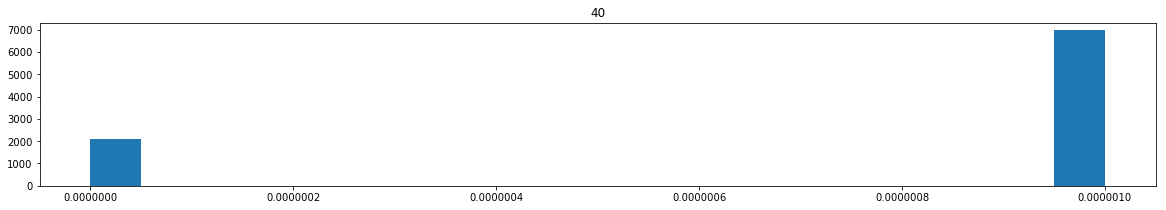

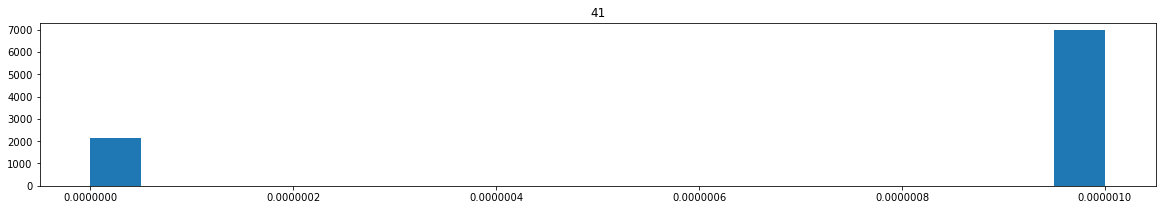

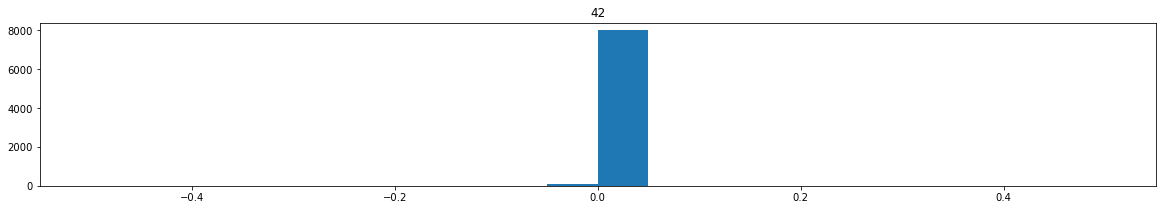

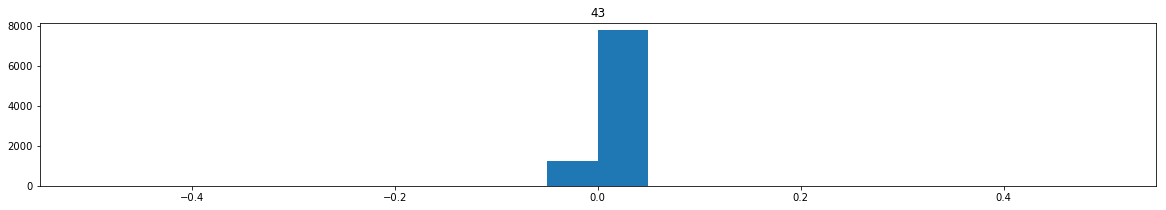

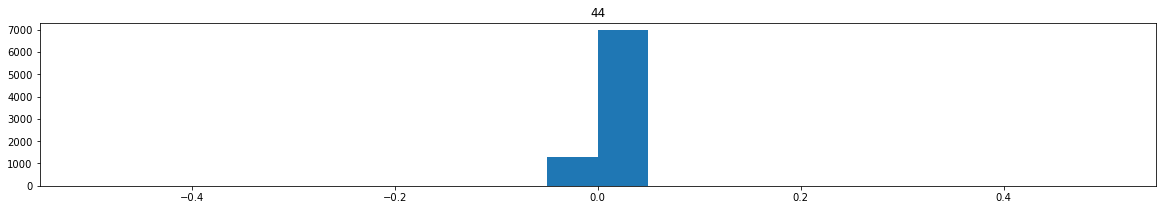

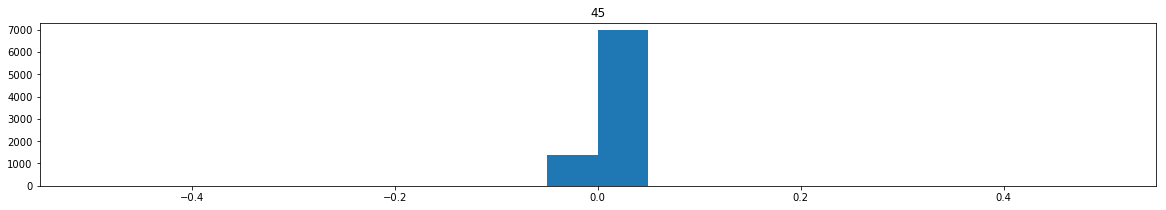

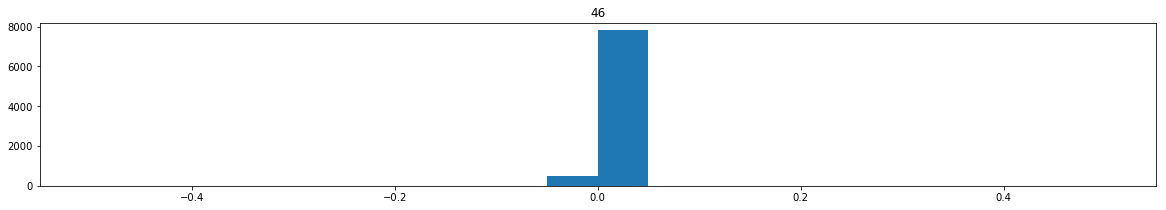

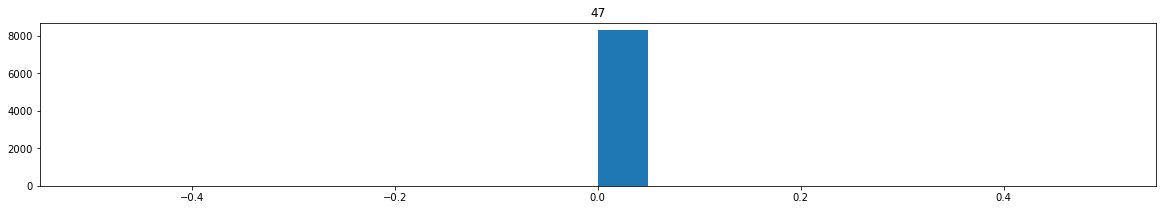

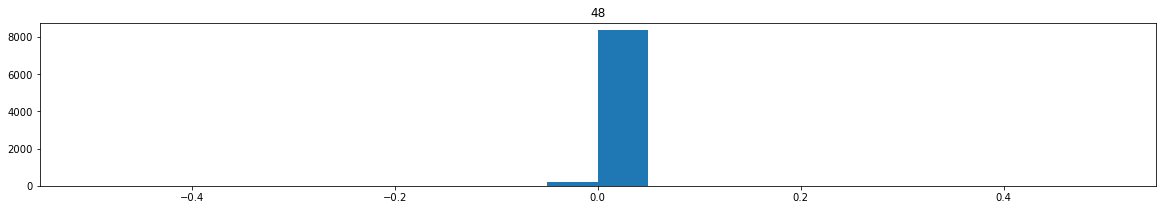

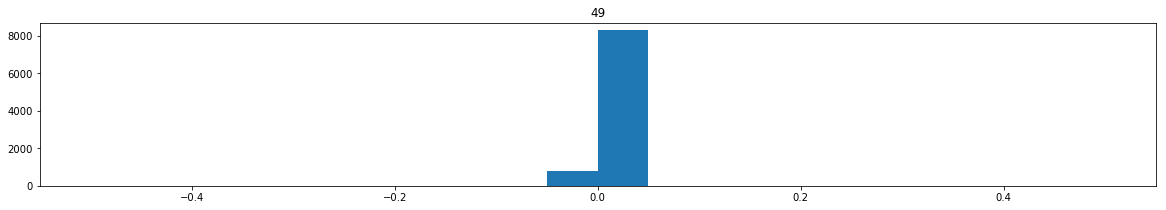

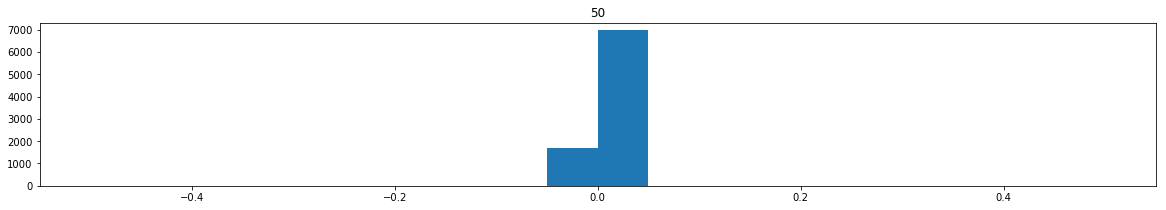

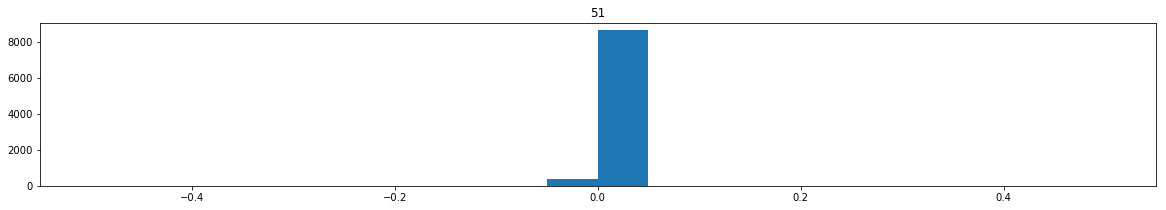

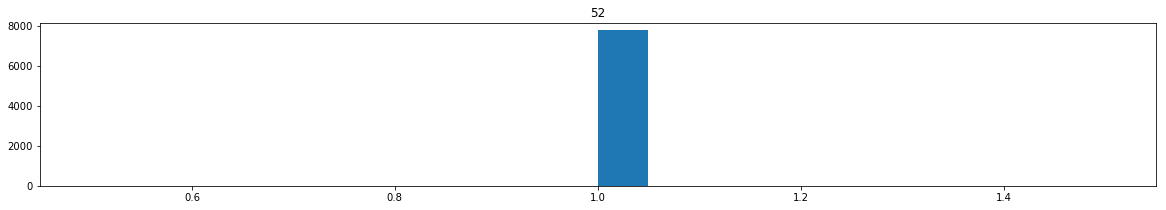

In [191]:
for i in range(columns_number):
    plt.figure(figsize=(20, 3))
    sorted_samples_i = np.sort(samplesT[i])
    lim = (sorted_samples_i[int(n * 0.2)],
             sorted_samples_i[int(n * 0.8)])
    plt.hist(samplesT[i], bins=20,
            range=lim)
    plt.title(i)
    plt.show()

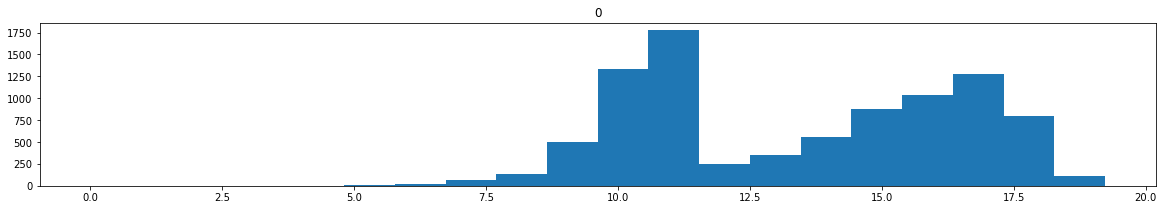

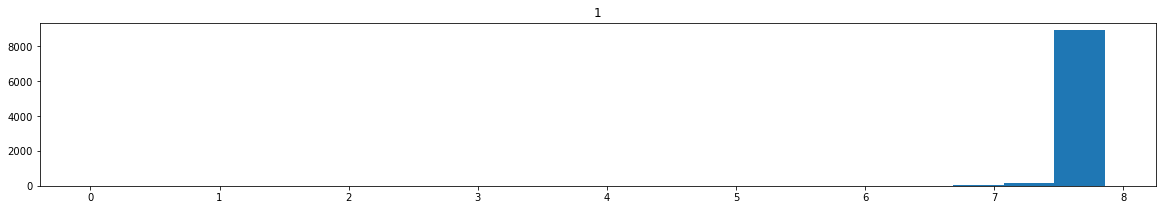

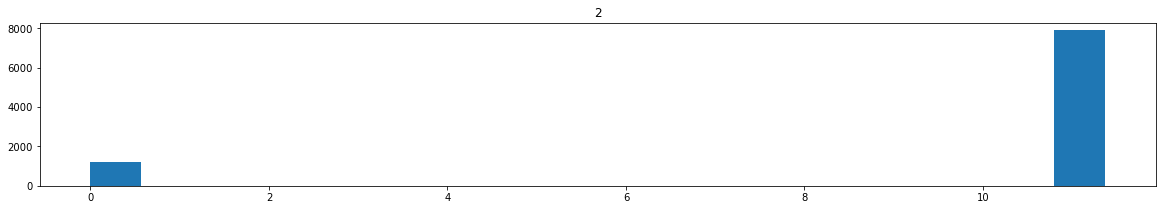

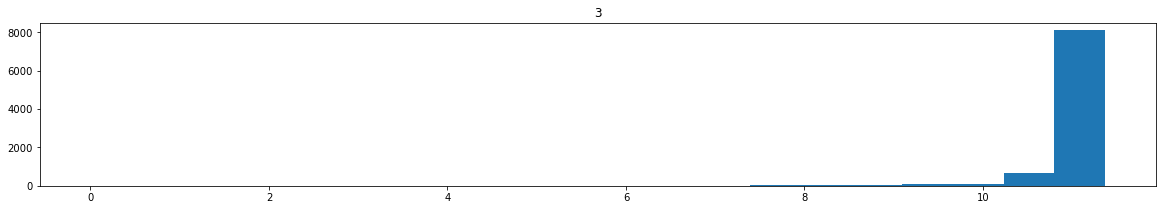

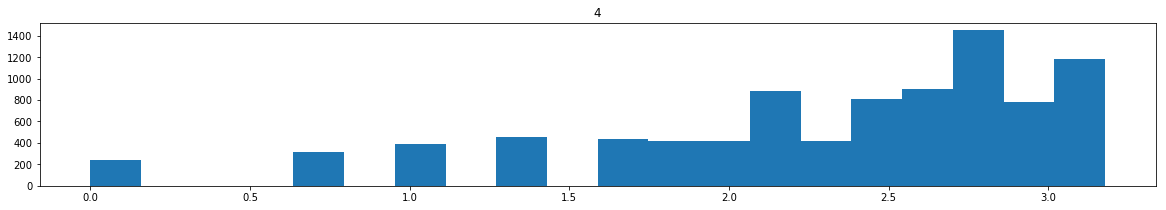

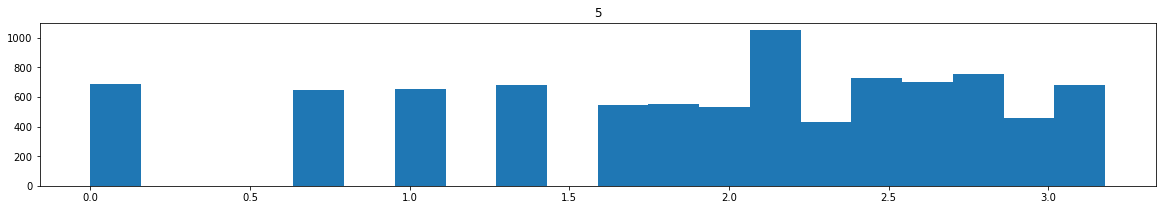

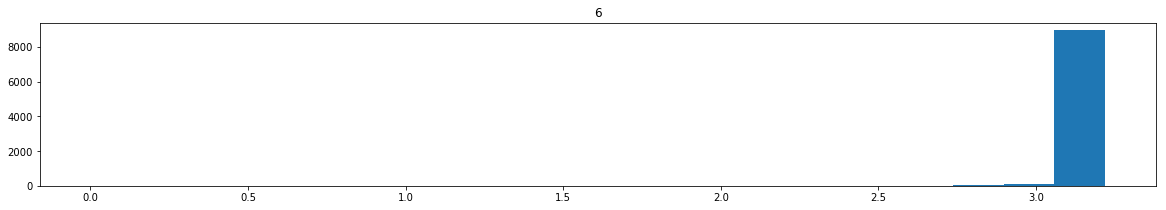

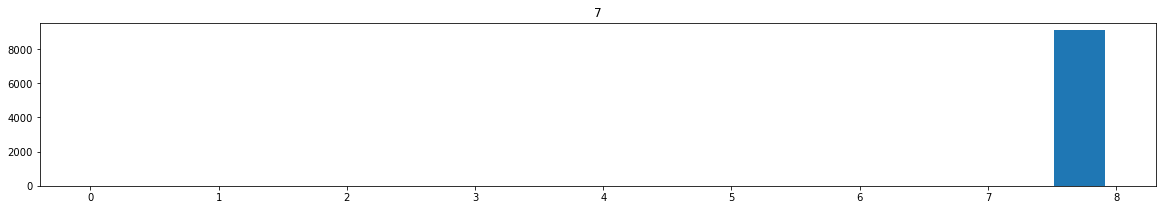

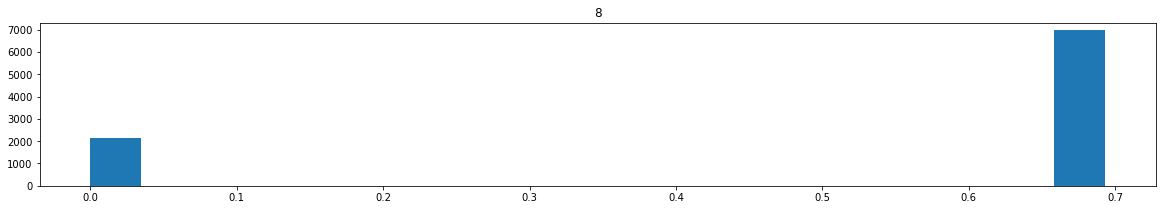

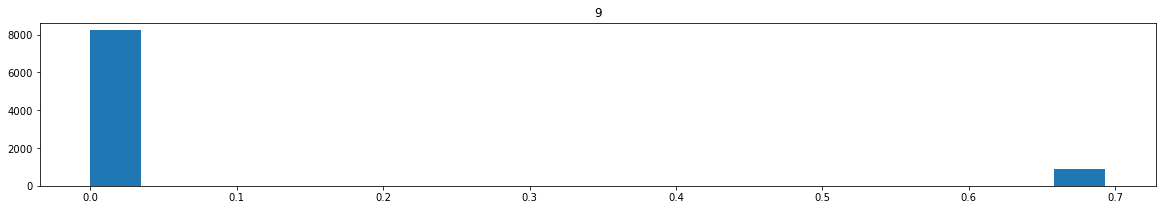

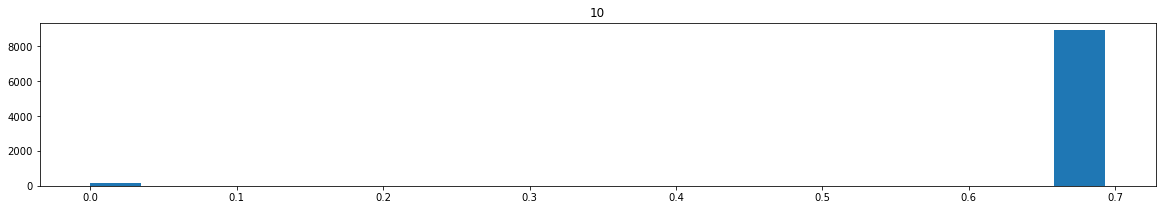

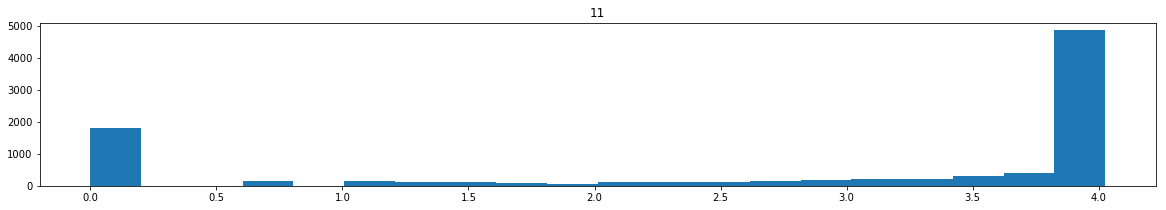

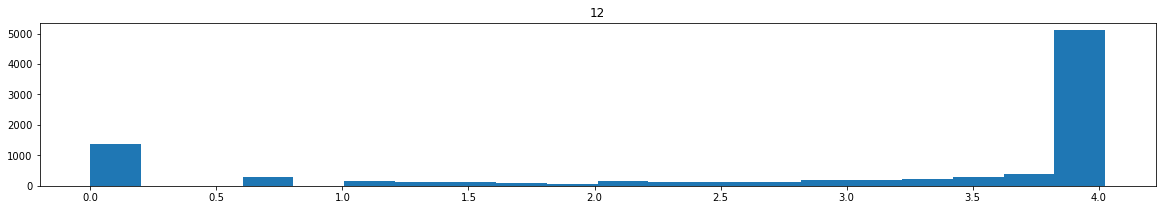

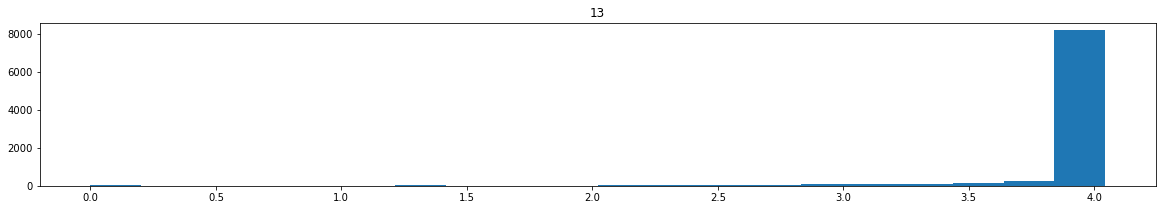

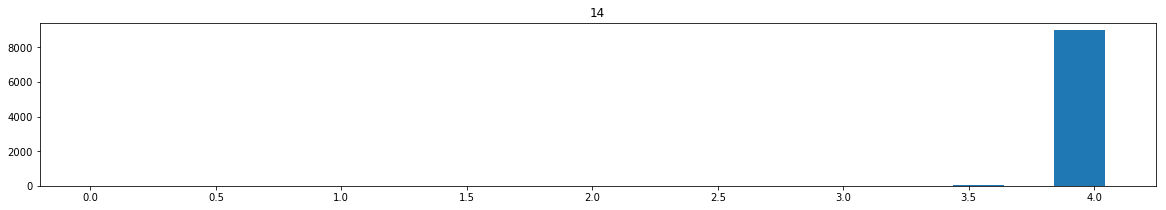

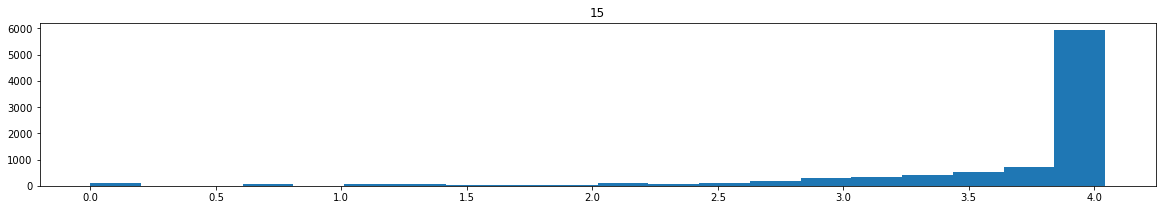

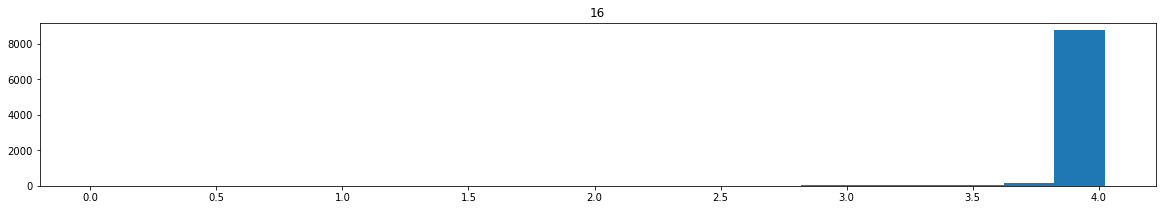

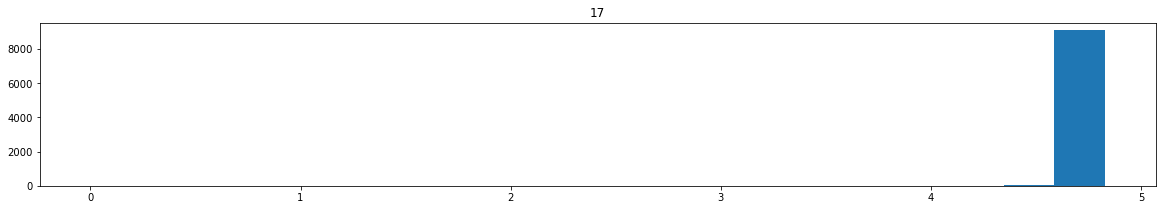

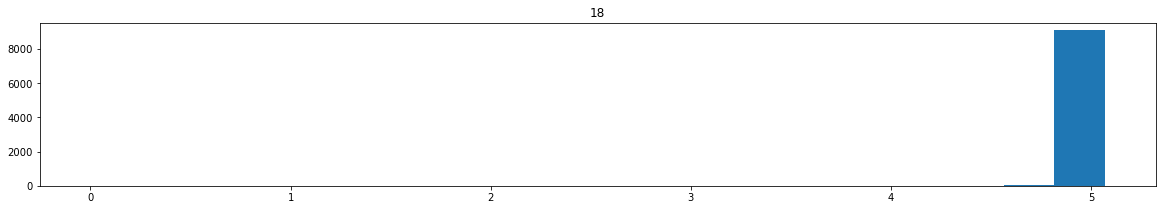

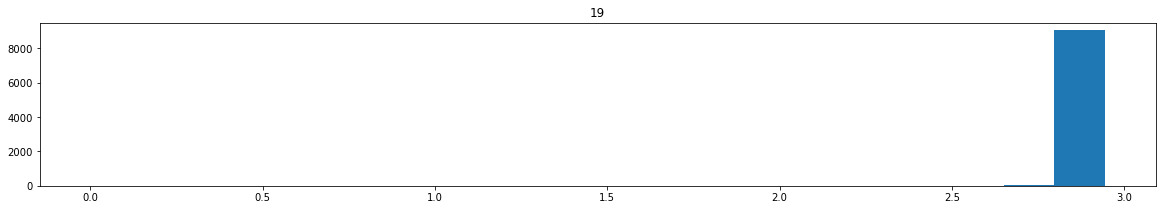

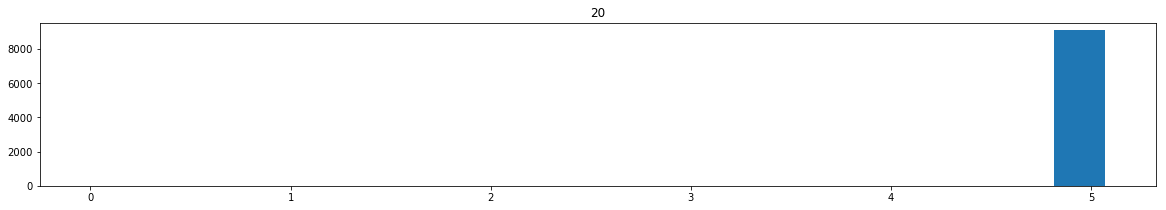

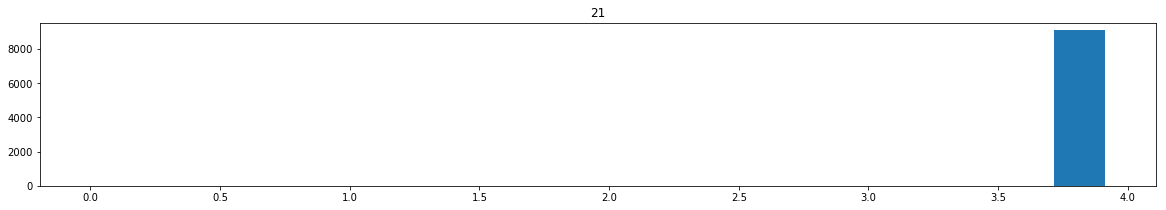

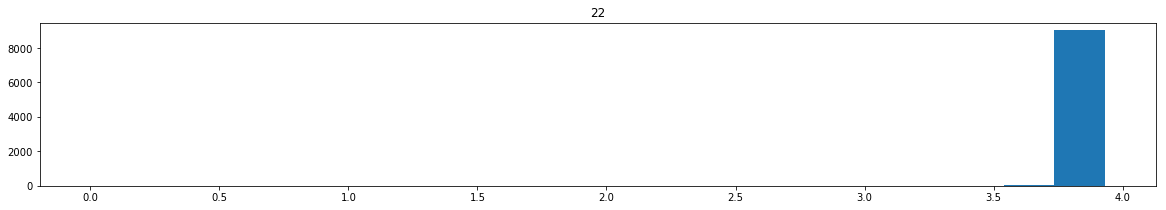

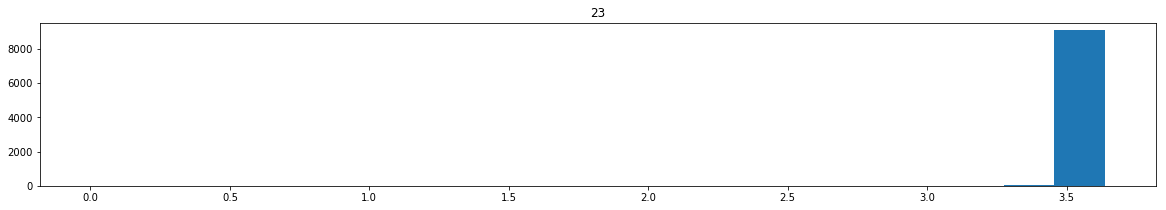

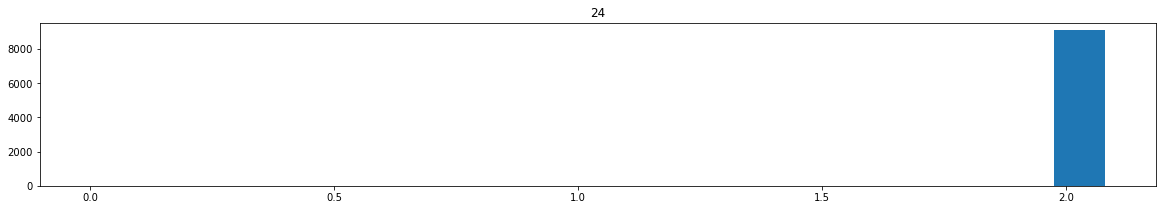

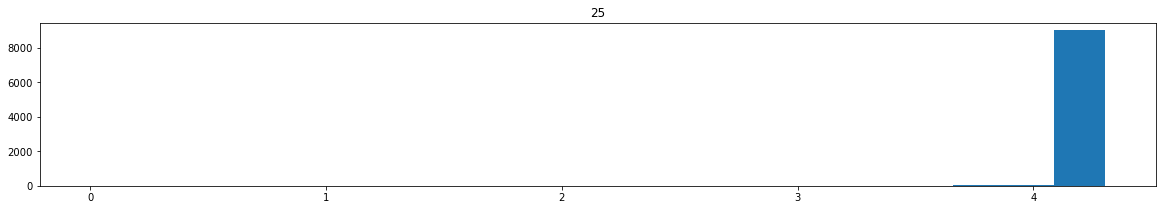

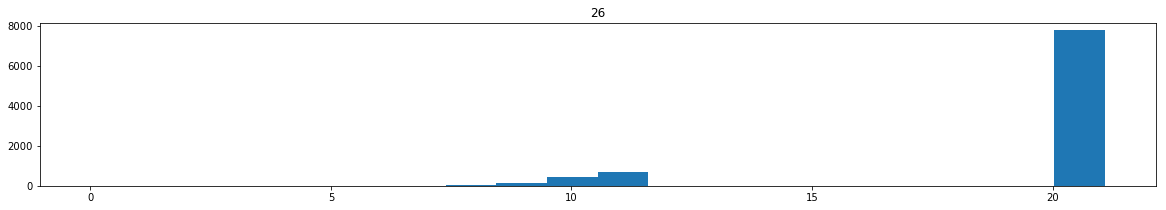

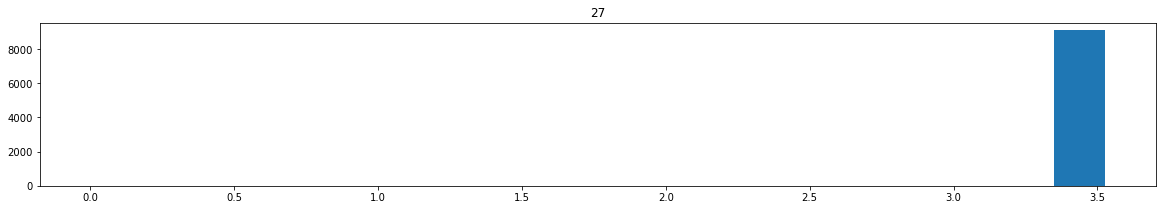

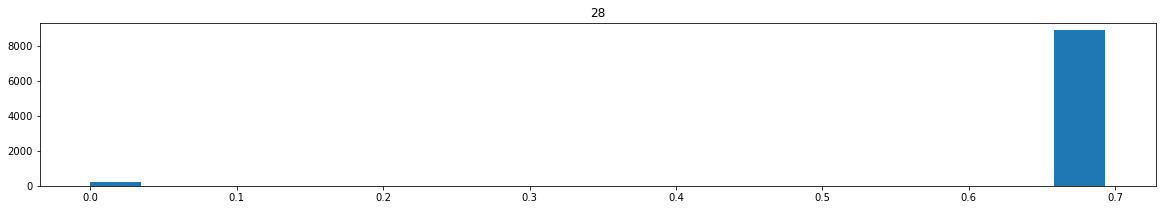

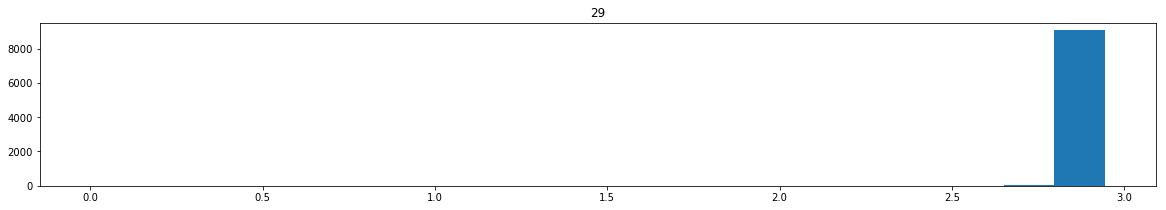

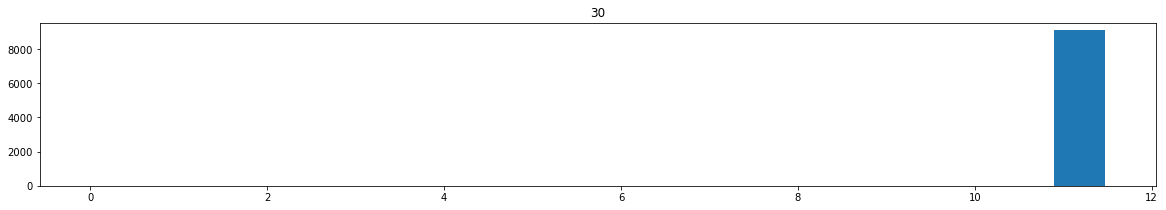

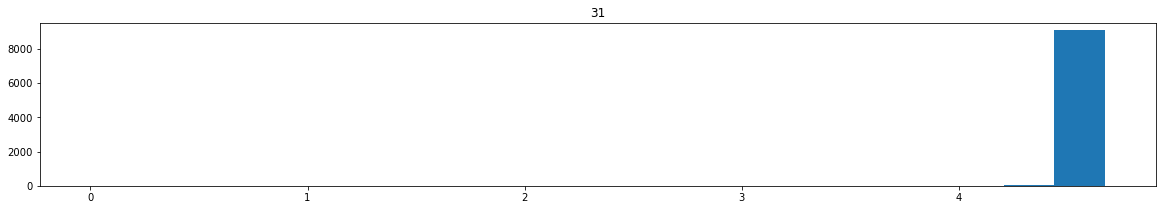

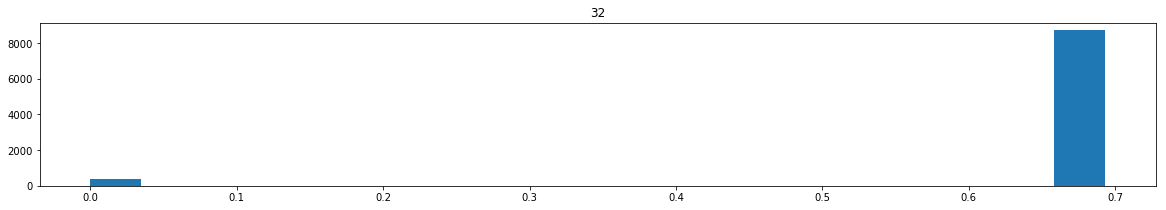

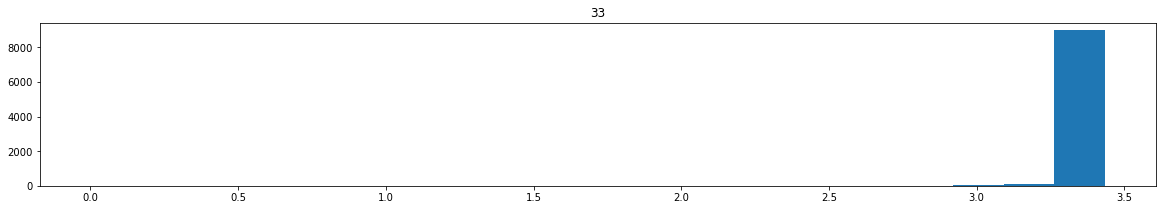

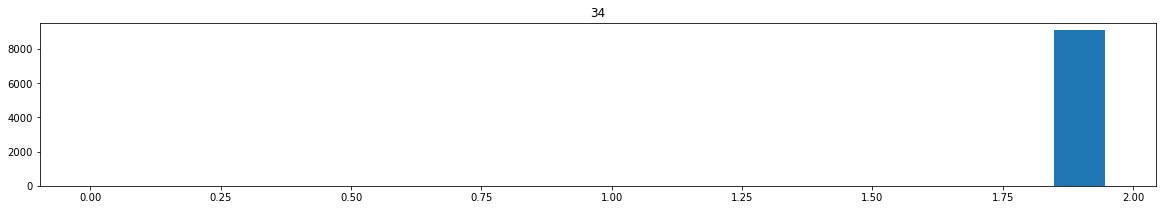

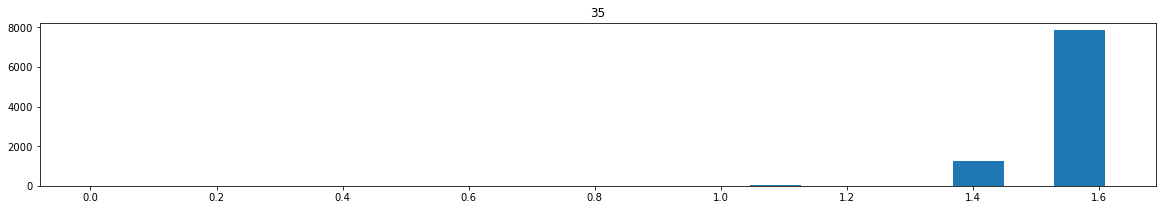

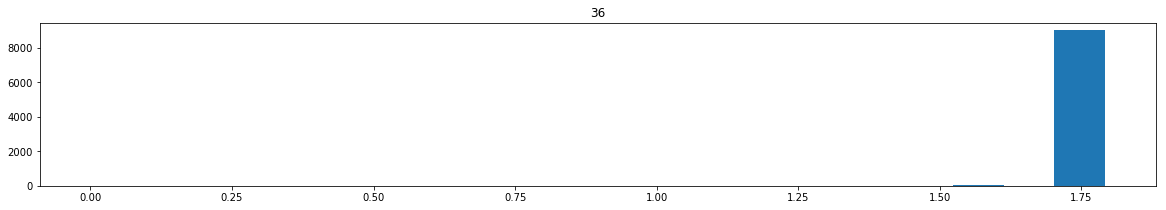

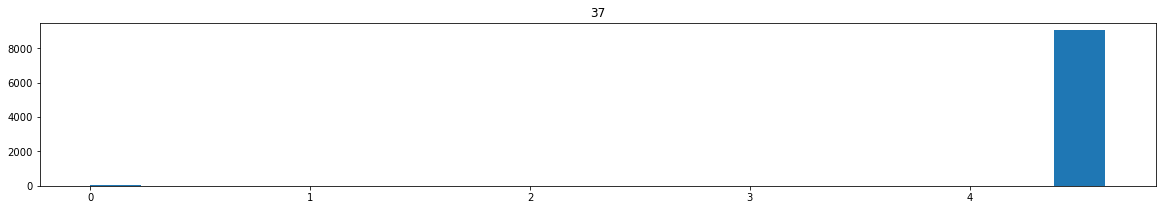

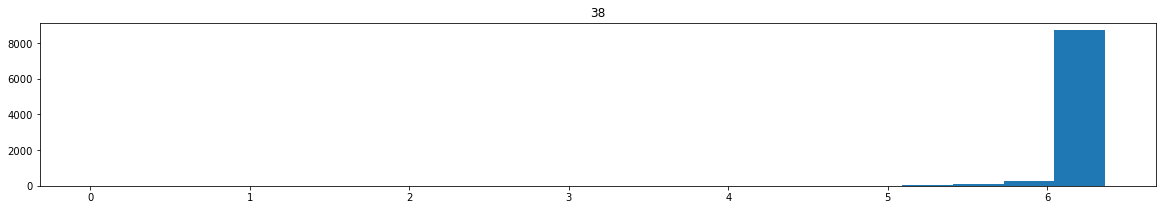

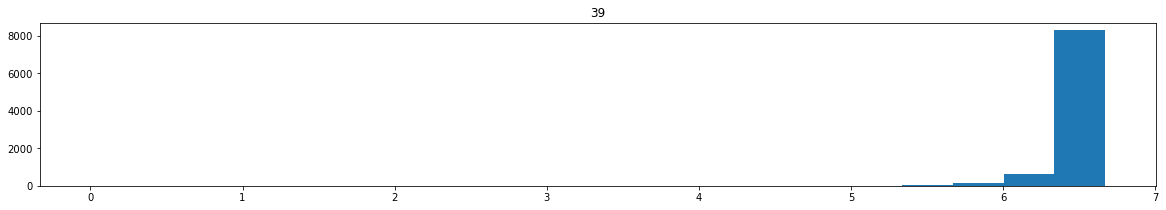

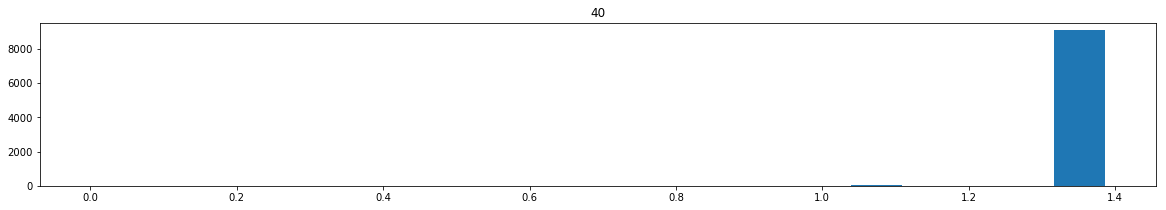

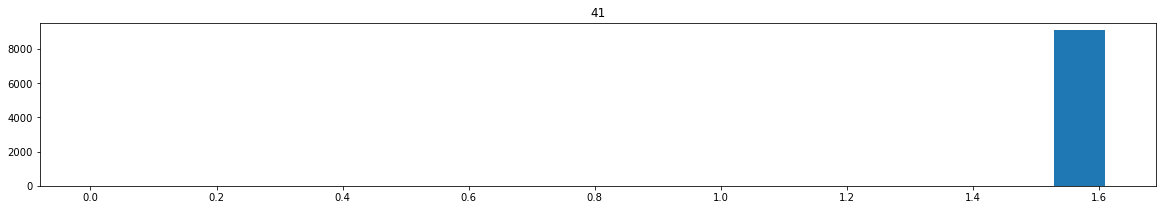

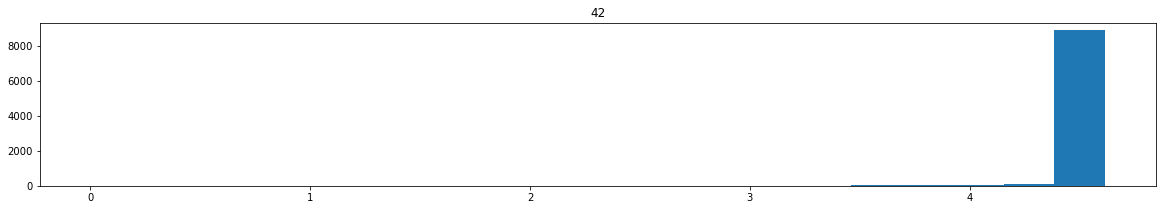

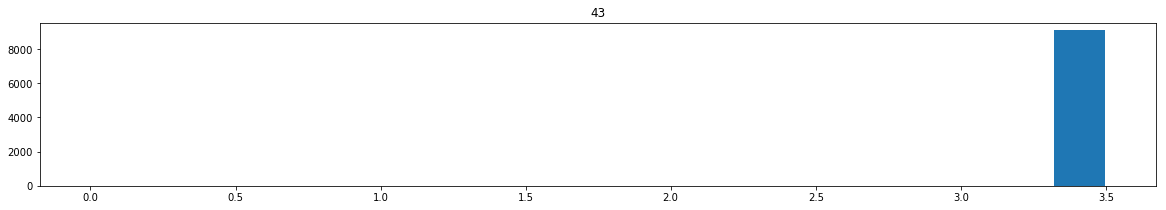

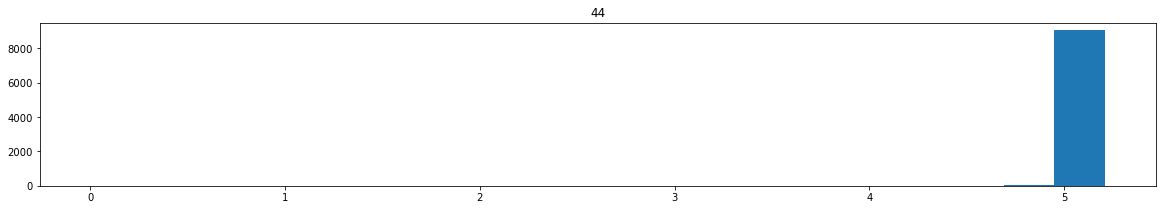

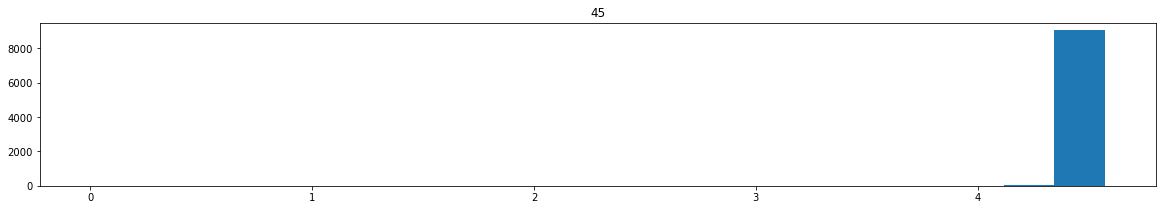

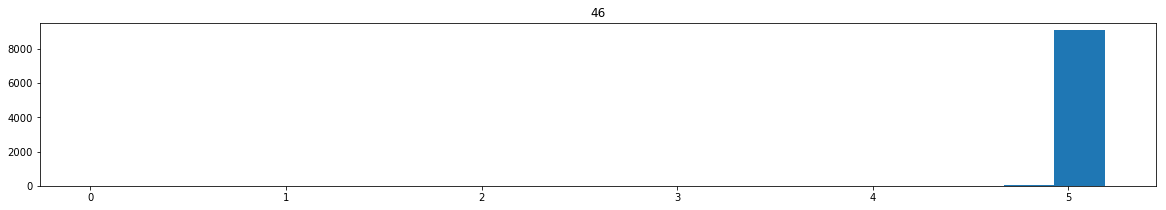

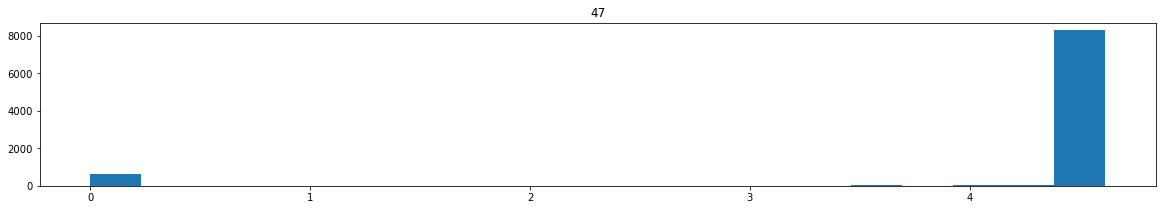

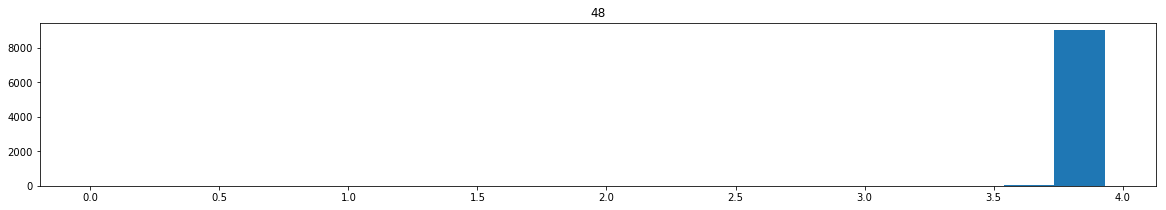

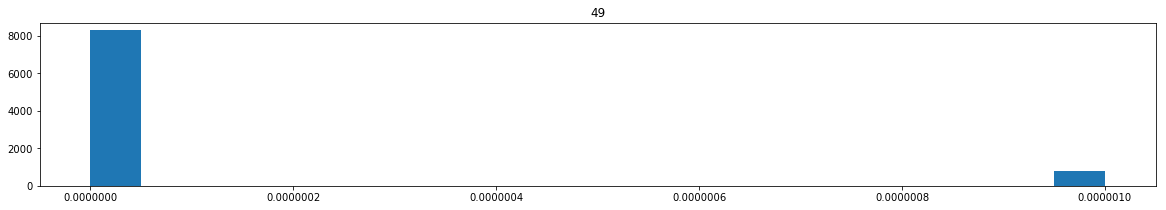

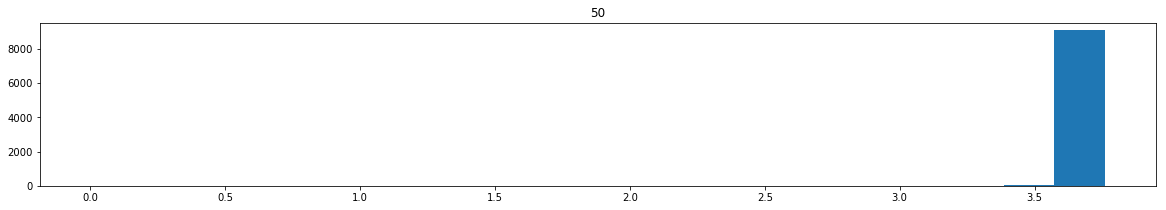

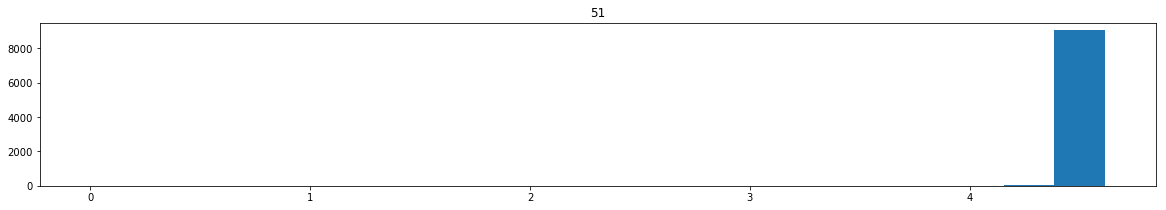

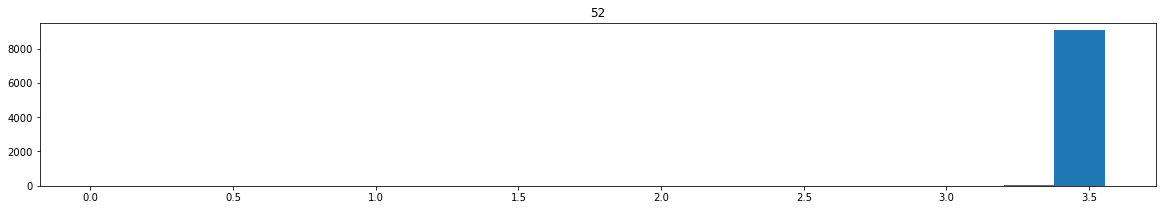

In [192]:
for i in range(columns_number):
    plt.figure(figsize=(20, 3))
    log_col = np.log(1 + max(samplesT[i]) - samplesT[i])
    plt.hist(log_col, bins=20, range=(log_col.min(), log_col.max()))
    plt.title(i)
    plt.show()

В обоих способах отображения (первый с обрезанными хваостами, второй с логарифмированием) плохим оказались:
    10, 14, 16, 29, 30, 31, 42, 48, 51, 52 (маловато ._.)

In [193]:
filtered_data = []
for i in range(columns_number):
    if i in {10, 14, 16, 29, 30, 31, 42, 48, 51, 52}:
        pass
    else:
        filtered_data.append(samplesT[i])
filtered_data = np.asarray(filtered_data)

In [212]:
print(filtered_data.shape)
print(columns_number)

(43, 9096)
53


Сделаем PCA и выберем самые важные компоненты.

In [209]:
# run PCA
pca1 = PCA(filtered_data.T)

important_columns = np.argsort(np.abs(pca1.Wt), axis=1)[:5, -5:]
print(important_columns)

[[40 39 41 33 32]
 [ 1  0 13 10 11]
 [20 26  9 23  8]
 [26 22 17 15 20]
 [ 4  9 26 30 31]]


In [210]:
important_columns_set = set()
for elem in important_columns.flatten():
    important_columns_set.add(elem)
print(important_columns_set)

{32, 33, 1, 0, 4, 39, 40, 41, 10, 11, 9, 13, 8, 15, 17, 20, 22, 23, 26, 30, 31}


In [213]:
pca_filtered_data = []
for i in range(43):
    if i in {32, 33, 1, 0, 4, 39, 40, 41, 10, 11, 9, 13, 8, 15, 17, 20, 22, 23, 26, 30, 31}:
        pca_filtered_data.append(filtered_data[i])
        
pca_filtered_data = np.asarray(pca_filtered_data)

А теперь можно посмотреть на корреляцию

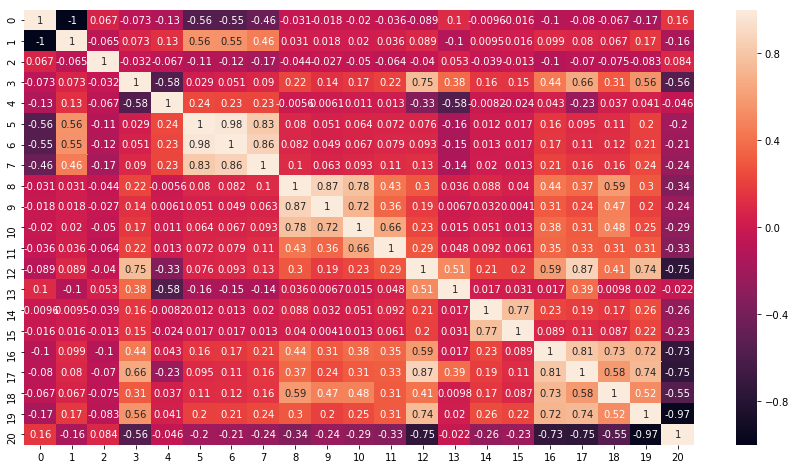

In [214]:
ax = plt.axes()
seaborn.heatmap(np.corrcoef(pca_filtered_data), annot=True, ax=ax)
plt.show()

Посмотрим на коррелирующие

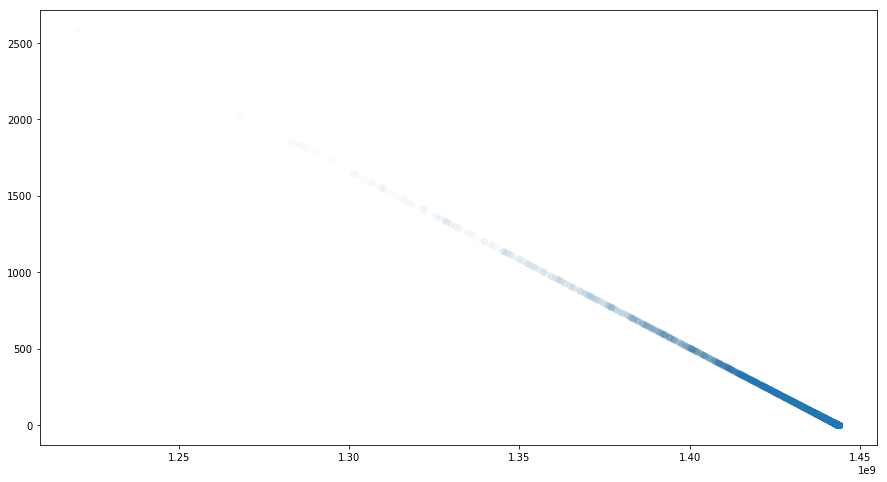

In [216]:
plt.scatter(pca_filtered_data[0], pca_filtered_data[1], alpha=0.02)
plt.show()

Зависимы.

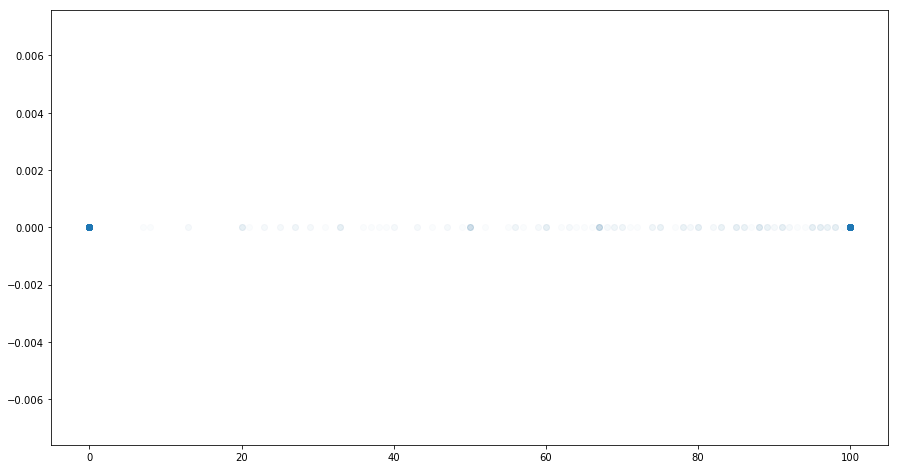

In [220]:
plt.scatter(pca_filtered_data[19], pca_filtered_data[20], alpha=0.02)
plt.show()

Кажется 20 близок к константе так что уберем его.

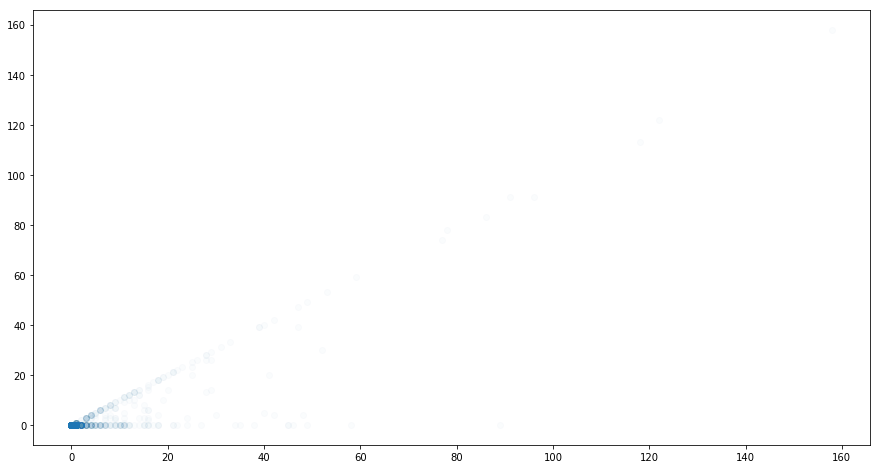

In [221]:
plt.scatter(pca_filtered_data[8], pca_filtered_data[9], alpha=0.02)
plt.show()

Тут засимость не такая явная и одно через другое вроде не выражается.

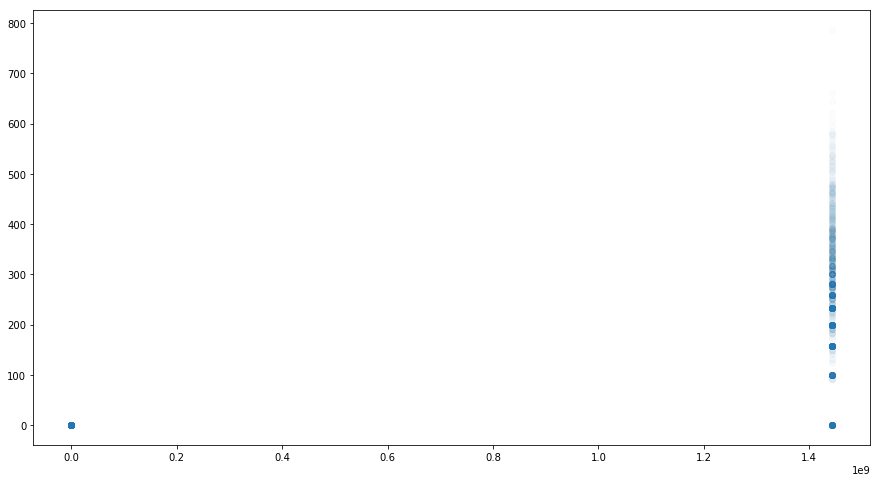

In [223]:
plt.scatter(pca_filtered_data[12], pca_filtered_data[17], alpha=0.02)
plt.show()

Тут нули могут являться чем-то вроде классификатора, так чт оставим. + явной зависимости недостаточно.

In [224]:
print(pca_filtered_data.shape)

(21, 9096)


In [225]:
final_data = []
for i in range(21):
    if i in {1, 20}:
        pass
    else:
        final_data.append(pca_filtered_data[i])
final_data = np.asarray(final_data)

In [226]:
print(final_data.shape)

(19, 9096)


In [227]:
final_dataT = final_data.T

## Абнормальность

### Define abnormality as rate of "how often does current object appear in the tails of distributions"

In [235]:
# calculate abnormality
p1=[]
p5=[]
p95=[]
p99=[]

K, N = final_data.shape

for i in range(0, K):
    p1.append(np.percentile(final_data[i], 1))
    p5.append(np.percentile(final_data[i], 5))
    p95.append(np.percentile(final_data[i], 95))
    p99.append(np.percentile(final_data[i], 99))

abnormality = {}
for i in range(0, N):
    abnormality[i] = 0
    for j in range(0, K):
        c = final_dataT[i][j]        
        # 1 point of abnormalito for getting into top or bottom 5%
        # +2 extra points of abnormality for getting into top or bottom 1%
        abnormality[i] += 2*(c < p1[j]) + (c < p5[j]) + (c > p95[j]) + 2*(c > p99[j])

#print some top abnormality examples
abn_sorted = sorted(abnormality.items(), key=lambda kv: kv[1], reverse=True)

for k, v in abn_sorted[:10]:
    print(k, v)

8821 23
97 21
3577 21
1471 20
3109 20
5726 20
6092 20
316 19
576 19
1346 19


Соотвественно слева - номер строк с скорее всего плохими пользователями.
Можно вывести больше их.

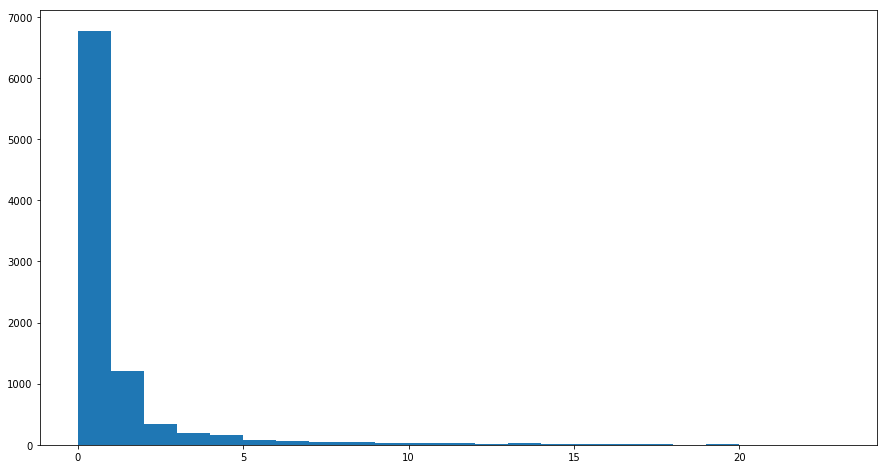

In [239]:
plt.hist(list(abnormality.values()), 23, range=(0, 23))
plt.show()

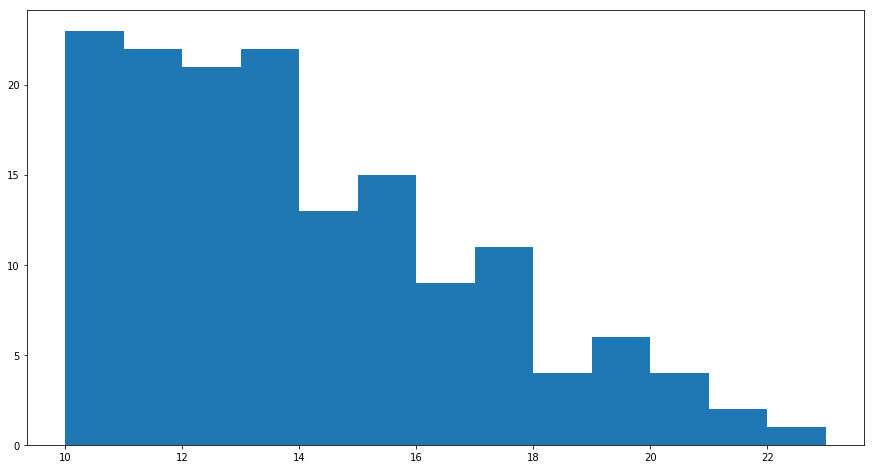

In [240]:
plt.hist(list(abnormality.values()), 13, range=(10, 23))
plt.show()

Ну по крайней мере тут островка абнормальности нет.

### Нормализуем данные (важно!!!)

In [306]:
norm_vector = np.linalg.norm(final_dataT, axis=0)
normed_dataT = final_dataT / norm_vector
normed_data = normed_dataT.T

In [321]:
# K-means clustering
nclusters = 4

centroid, label = scipy.cluster.vq.kmeans2(normed_dataT, nclusters, iter=200, thresh=1e-05, minit='random', missing='warn')
# result of this k-means is unstable, changes when you recalculate the cell

# small trick, explained below
def truevar(x): 
    return np.var(x)

# put abnormality and cluster_id into DataFrame to easily calculate stats:
df_abn = pd.DataFrame(list(abnormality.values()), columns=[['abn']])
df_label = pd.DataFrame(label, columns=[['cluster_id']])
cluster_stats = pd.concat([df_abn, df_label], axis=1)\
.pivot_table(
    index='cluster_id',
    values='abn',
    aggfunc=[len, np.mean, np.std, truevar]
)

# reorder axis to make cluster_stats look simpler
cluster_stats2 = cluster_stats.reorder_levels([1,0], axis=1)['abn']
cluster_stats2


,len,mean,std,truevar
cluster_id,,,,
0,1129,3.059345,2.893350,8.364060
1,88,14.636364,3.407840,11.481405
2,73,8.068493,3.326363,10.913117
3,7806,0.210992,0.632405,0.399884


4 кластера вышло оптимально по "скору"

In [322]:
# calculate within-cluster variance and % of total variance explained
cluster_stats2['var_in_cluster'] = cluster_stats2['truevar'] * cluster_stats2['len'] / sum(cluster_stats2['len'])
totvar = np.var(list(abnormality.values()))
cluster_stats2['var_in_cluster_%'] = cluster_stats2['var_in_cluster'] / totvar

print('')
print('total abnormality variance: %s' % totvar)
print('abnormality variance explained by between-cluster variance: %.2f%%' % ((1-sum(cluster_stats2['var_in_cluster_%'])) *100 ))
print('abnormality variance left inside clusters: %.2f%%' % (sum(cluster_stats2['var_in_cluster_%']) *100 ))

cluster_stats2



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 66.99%
abnormality variance left inside clusters: 33.01%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
cluster_id,,,,,,
0,1129,3.059345,2.893350,8.364060,1.038151,0.216897
1,88,14.636364,3.407840,11.481405,0.111078,0.023207
2,73,8.068493,3.326363,10.913117,0.087583,0.018298
3,7806,0.210992,0.632405,0.399884,0.343172,0.071698


Кластер 1 в данном случае с аномалиями. 2 возможно тоже.

### Колонки классификаторы

Нужно решить, какое максимальное количество кластеров мы можем позволить.
И давайте тогда не конвертить данные в самом начале.

In [283]:
data = pd.read_table('dataset_16_2', sep='\t', header=None)
data.head()
data = np.asarray(data)
dataT = data.T

In [284]:
n_clusters = 10 # max clusters number

In [286]:
K, N = dataT.shape
print(dataT.shape)

(55, 9096)


In [292]:
CLASSIFICATION_COLUMNS = []
for i in range(K):
    if len(set(dataT[i])) <= n_clusters:
        print(i, set(dataT[i]))
        CLASSIFICATION_COLUMNS.append(i)

10 {0, 1}
11 {0, 1}
12 {0, 1}
26 {'0', '3', '-', '2', '6', '7', '1'}
30 {'0', '-', '1'}
34 {0, 1}
36 {'0', '3', '-', '5', '2', '6', '1'}
37 {'0', '3', '-', '2', '4', '1'}
38 {'0', '3', '-', '5', '2', '4', '1'}
42 {'0', '3', '-', '1', '2'}
43 {'4', '0', '-', '1', '2'}
51 {'0', '-'}


Ну го попробуем по оригинальным столбцам.

In [299]:
for i in CLASSIFICATION_COLUMNS:
    # natural clusterization

    df_abn = pd.DataFrame(list(abnormality.values()), columns=[['abn']])
    df_label2 = pd.DataFrame(dataT[i], columns=[['column' + str(i)]])

    cluster_stats = pd.concat([df_abn, df_label2], axis=1)\
    .pivot_table(
        index='column' + str(i),
        values='abn',
        aggfunc=[len, np.mean, np.std, truevar]
    )\
    .reorder_levels([1,0], axis=1)['abn']

    # calculate within-cluster variance and % of total variance explained
    cluster_stats['var_in_cluster'] = cluster_stats['truevar'] * cluster_stats['len'] / sum(cluster_stats['len'])
    cluster_stats['var_in_cluster_%'] = cluster_stats['var_in_cluster'] / totvar

    print('')
    print('total abnormality variance: %s' % totvar)
    print('abnormality variance explained by between-cluster variance: %.2f%%' % ((1-sum(cluster_stats['var_in_cluster_%'])) *100 ))
    print('abnormality variance left inside clusters: %.2f%%' % (sum(cluster_stats['var_in_cluster_%']) *100 ))

    display(cluster_stats)


total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 22.64%
abnormality variance left inside clusters: 77.36%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column10,,,,,,
0,6959,0.190257,0.575701,0.331384,0.253529,0.052969
1,2137,2.645765,3.832448,14.680788,3.449081,0.720605



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 0.53%
abnormality variance left inside clusters: 99.47%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column11,,,,,,
0,872,1.256881,1.989195,3.952361,0.378898,0.079162
1,8224,0.715224,2.201650,4.846675,4.382042,0.915525



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 3.20%
abnormality variance left inside clusters: 96.80%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column12,,,,,,
0,8917,0.711674,2.075939,4.309041,4.224243,0.882557
1,179,3.530726,4.570657,20.774196,0.408815,0.085412



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 26.27%
abnormality variance left inside clusters: 73.73%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column26,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,2111,2.554240,3.732624,13.925883,3.231919,0.675234
1,17,8.705882,3.312188,10.325260,0.019297,0.004032
2,6,11.500000,6.655825,36.916667,0.024351,0.005088
3,1,17.000000,NaN,0.000000,0.000000,0.000000
6,1,13.000000,NaN,0.000000,0.000000,0.000000
7,1,15.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 27.94%
abnormality variance left inside clusters: 72.06%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column30,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,1901,2.279853,3.467072,12.014265,2.510897,0.524593
1,236,5.593220,5.148414,26.393852,0.684801,0.143073



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 2.97%
abnormality variance left inside clusters: 97.03%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column34,,,,,,
0,8705,0.687191,2.131942,4.544655,4.349299,0.908684
1,391,2.547315,2.621839,6.856457,0.294731,0.061577



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 23.20%
abnormality variance left inside clusters: 76.80%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column36,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,2119,2.639453,3.830112,14.662832,3.415847,0.713661
1,8,2.000000,1.927248,3.250000,0.002858,0.000597
2,2,3.500000,0.707107,0.250000,0.000055,0.000011
3,5,1.800000,2.167948,3.760000,0.002067,0.000432
5,2,13.500000,3.535534,6.250000,0.001374,0.000287
6,1,2.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 34.75%
abnormality variance left inside clusters: 65.25%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column37,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,879,0.786121,1.403620,1.967907,0.190170,0.039732
1,1227,3.907905,4.384515,19.208308,2.591094,0.541348
2,27,5.592593,5.507053,29.204390,0.086688,0.018112
3,3,2.666667,2.886751,5.555556,0.001832,0.000383
4,1,9.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 45.00%
abnormality variance left inside clusters: 55.00%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column38,,,,,,
-,7765,0.200386,0.599695,0.359588,0.306970,0.064134
0,1239,3.704600,3.984003,15.859470,2.160277,0.451339
1,71,8.535211,4.364896,18.783971,0.146621,0.030633
2,15,10.466667,3.398879,10.782222,0.017781,0.003715
3,4,12.750000,1.707825,2.187500,0.000962,0.000201
4,1,9.000000,NaN,0.000000,0.000000,0.000000
5,1,9.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 25.06%
abnormality variance left inside clusters: 74.94%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column42,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,2103,2.559677,3.738748,13.971593,3.230240,0.674883
1,25,7.560000,6.000556,34.566400,0.095004,0.019849
2,8,10.000000,3.251373,9.250000,0.008135,0.001700
3,1,2.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 23.06%
abnormality variance left inside clusters: 76.94%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column43,,,,,,
-,6959,0.190257,0.575701,0.331384,0.253529,0.052969
0,2123,2.631182,3.820687,14.590775,3.405477,0.711495
1,11,3.454545,4.156047,15.702479,0.018989,0.003967
2,2,8.500000,6.363961,20.250000,0.004453,0.000930
4,1,13.000000,NaN,0.000000,0.000000,0.000000



total abnormality variance: 4.78637033182
abnormality variance explained by between-cluster variance: 42.19%
abnormality variance left inside clusters: 57.81%


,len,mean,std,truevar,var_in_cluster,var_in_cluster_%
column51,,,,,,
-,8293,0.324973,0.909376,0.826866,0.753870,0.157503
0,803,5.333748,4.778453,22.805175,2.013254,0.420622


38 и 51 колонки зажгли =( А я 51 выкинула(((

В 51 я зря заменяла '-' в начале на то же, что и ноль. Наверное без этого был бы лучше результат.
Теперь знаю, что такая замена совсем не очень. Но если я сейчас поменяю, то весь анализ придется делать заново.
Причем в 38 колонке возможно классно как раз из-за '-'.
Зарублю себе на будущее, что возможно 0 надо поменять на оч маленький эпсилон (ноль меняю, чтобы нигде не было ошибок деления),
а на что менять '-' для анализа - это вопрос =( может просто на отличный эпсилон от первого. Тогда бы я спасла как минимум столбец 51.

На определение анормальности это бы впрочем тоже повлияло. И скорее всего скор даже улучшился, так как то, что мы бы разделили, возможно, начало бы приносить нам плюсы абнормальности в одном из кластеров.

Энивей, классификацией результат вышел круче. 45 процентов тут максимум, а у нас 66.

## Регрессия

Тут нам нужны численные значения. Так что воспользуемся уже посчитанной штукой.

In [325]:
print(samples.shape)

(9096, 53)


Я так поняла, что регрессия аномальности == регрессия абнормальности.
Надеюсь, правильно. Ммм... учитывая что нам надо посчитать точность и полноту - видимо, мы должны типа наверное отсечь абнормальность. Типа больше такого числа - значит, аномалия.

Сложно понять, если честно, что конкретно нужно.

Отсечем по 4....

In [364]:
abnormality_thres = 4

In [365]:
y = np.array(list(abnormality.values())) > abnormality_thres

In [366]:
print(y.sum())
print(samples.shape)

422
(9096, 53)


In [373]:
model = LinearRegression()

In [374]:
model.fit(samples, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [375]:
y_pred = model.predict(samples)

In [376]:
print(y_pred.sum())
n = len(y_pred)

422.0


In [377]:
y_pred = np.zeros(n) * (y_pred < 0.5) + np.ones(n) * (y_pred >= 0.5)

In [381]:
precision_recall_fscore_support(y, y_pred)

(array([ 0.98891429,  0.93930636]),
 array([ 0.99757897,  0.77014218]),
 array([ 0.99322773,  0.84635417]),
 array([8674,  422]))

In [382]:
accuracy_score(y, y_pred)

0.98702726473175018

Линейная регрессия как-то зашла лучше логичтической.